<h1> Impact of COVID-19 on crime in Sacramento city </h1>
<h5> This module contains code for the following <br> </h5> 
    - Creation of SQLite database in the local machine
    - Creation of tables (one table for every source) inside the database

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

#### Gathering data from different sources as table into one database
    1. Creation of new database named "crime-data"
    2. Creation of tables for crime, 911 dispatch, census data downloaded from website. One table for every data

In [2]:
#### User-defined functions

def create_connection(path):
    '''This function creates a connection to the specified SQLite database. Creates database
    if it is not present before. Returns none.'''
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    finally:
        if connection:
            connection.close()
    return None

# Function that creates new tables inside the newly created SQLite database
def create_tables(path):
    '''Create tables inside the given database from csv files'''
    data_sources = [file for file in os.listdir() if file.endswith(".csv")]
    for data in data_sources:
        df = pd.read_csv(path+data)
        df.to_sql(data.split(".")[0], connection, if_exists="replace", index = False)
        print(f'Table {data.split(".")[0]} created')    
    return None

In [3]:
# 1. Creation of new database named "crime-data"
create_connection(r'/Users/archana/Documents/GitHub/Impact-of-COVID19-on-crime-in-Sacramento-city/crimedata.db')

# 2. Creation of tables for every data inside the crimedata database
connection = sqlite3.connect("crimedata.db")
path = "/Users/archana/Documents/GitHub/Impact-of-COVID19-on-crime-in-Sacramento-city/"
create_tables(path)


Connection to SQLite DB successful
Table Census_Population created
Table Sacramento_Crime_2018 created
Table Sacramento_Crime_2019 created
Table Sacramento_Crime_2020 created
Table POLICE_GRIDS created
Table POLICE_BEATS created
Table Sacramento_Dispatch_2019 created
Table Sacramento_Dispatch_2018 created
Table Sacramento_Crime_2015 created
Table Sacramento_Crime_2017 created
Table Sacramento_Dispatch_2020 created
Table POLICE_DISTRICTS created
Table Sacramento_Crime_2016 created


In [4]:
# Checking for all the tables inside the database
cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f"There are {len(tables)} tables in the database")
print("They are:", [i[0] for i in tables] )

There are 13 tables in the database
They are: ['Census_Population', 'Sacramento_Crime_2018', 'Sacramento_Crime_2019', 'Sacramento_Crime_2020', 'POLICE_GRIDS', 'POLICE_BEATS', 'Sacramento_Dispatch_2019', 'Sacramento_Dispatch_2018', 'Sacramento_Crime_2015', 'Sacramento_Crime_2017', 'Sacramento_Dispatch_2020', 'POLICE_DISTRICTS', 'Sacramento_Crime_2016']


2. Adding data from different sources as tables to the "crimedata" SQL database <br>
2.1 Census data 
2.2 crime data
2.3 dispatch data (http://data.cityofsacramento.org/datasets/9efe7653009b448f8d177c1da0cc068f_0)
2.4 police district
2.5 beat
2.6 neighborhood

In [5]:
### Exploring crime data from 2018 - present
## Just checking the schema for all three tables:
crime2015 = pd.read_sql_query('pragma table_info(Sacramento_Crime_2015)', connection)
crime2016 = pd.read_sql_query('pragma table_info(Sacramento_Crime_2016)', connection)
crime2017 = pd.read_sql_query('pragma table_info(Sacramento_Crime_2017)', connection)
crime2018 = pd.read_sql_query('pragma table_info(Sacramento_Crime_2018)', connection)
crime2019 = pd.read_sql_query('pragma table_info(Sacramento_Crime_2019)', connection)
crime2020 = pd.read_sql_query('pragma table_info(Sacramento_Crime_2020)', connection)

print("2018 and 2019 crime data have same format?", crime2018.equals(crime2019))
print("2018 and 2020 crime data have same format?", crime2018.equals(crime2020))
print("2018 and 2017 crime data have same format?", crime2018.equals(crime2017))
print("2018 and 2016 crime data have same format?", crime2018.equals(crime2016))
print("2018 and 2015 crime data have same format?", crime2018.equals(crime2015))

print(crime2018['name'])


2018 and 2019 crime data have same format? True
2018 and 2020 crime data have same format? True
2018 and 2017 crime data have same format? False
2018 and 2016 crime data have same format? False
2018 and 2015 crime data have same format? False
0            OBJECTID
1           Record_ID
2        Offense_Code
3         Offense_Ext
4    Offense_Category
5         Description
6     Police_District
7                Beat
8                Grid
9      Occurence_Date
Name: name, dtype: object


In [9]:
crime2015

cid              name     type  notnull dflt_value  pk
0    0               FID  INTEGER        0       None   0
1    1         Record_ID  INTEGER        0       None   0
2    2      Offense_Code  INTEGER        0       None   0
3    3       Offense_Ext     TEXT        0       None   0
4    4  Offense_Category     TEXT        0       None   0
5    5       Description     TEXT        0       None   0
6    6   Police_District     TEXT        0       None   0
7    7              Beat     TEXT        0       None   0
8    8              Grid     TEXT        0       None   0
9    9    Occurence_Date     TEXT        0       None   0

In [50]:
crime_early = pd.read_sql_query("SELECT * FROM Sacramento_Crime_2015 \
                  UNION \
                  SELECT * FROM Sacramento_Crime_2016 \
                  UNION \
                  SELECT * FROM Sacramento_Crime_2017 \
                  ", connection)

In [52]:
crime_early

FID  Record_ID  Offense_Code Offense_Ext Offense_Category  \
0           1    1073977          5213           5   WEAPON OFFENSE   
1           1    1147173          1313          19          BATTERY   
2           1    1218324          2305           0          LARCENY   
3           2    1074004          2404           0   STOLEN VEHICLE   
4           2    1147207          1315          20      AGG ASSAULT   
...       ...        ...           ...         ...              ...   
117229  40258    1159439          2404           0   STOLEN VEHICLE   
117230  40259    1159696          2303           1          LARCENY   
117231  40260    1217763          2399           2          LARCENY   
117232  40261    1218761          2204           0         BURGLARY   
117233  40262    1219357          2404           0   STOLEN VEHICLE   

                           Description Police_District Beat  Grid  \
0       246.3(A) PC NEGL DISCH FIREARM               2   2B  0541   
1              242 PC BATTERY CIVILIAN               3   3M  0744   
2       484 PETTY THEFT CLOUT UNLOCKED               1   1B  0434   
3        10851(A)VC TAKE VEH W/O OWNER               1   1B  0401   
4               245(A)(2) AWDW-FIREARM               3   3A  0721   
...                                ...             ...  ...   ...   
117229   10851(A)VC TAKE VEH W/O OWNER               5   5A  1387   
117230     487(A) PC GRAND THEFT >$950               1   1B  0423   
117231              484 PC PETTY THEFT               4   4C  1295   
117232  459 PC BURG RESIDENCE-NO FORCE               2   2C  0623   
117233   10851(A)VC TAKE VEH W/O OWNER               4   4B  0958   

            Occurence_Date  
0      2015-01-01 08:03:00  
1      2016-01-01 08:23:00  
2      2017-01-05 05:00:00  
3      2015-01-01 11:00:00  
4      2016-01-01 09:46:00  
...                    ...  
117229 2015-12-02 20:29:59  
117230 2015-04-19 00:59:59  
117231 2016-01-01 06:30:00  
117232 2015-09-24 20:45:00  
117233 2015-12-25 20:00:00  

[117234 rows x 10 columns]

In [55]:
plt.rcParams["figure.figsize"] = [12,4]
#crime_early['Occurence_Date'] = pd.to_datetime(crime_early.Occurence_Date)
crime_early.drop('FID', axis = 1, inplace = True)
crime_early.set_index('Occurence_Date', inplace = True)
crime_early.groupby(pd.Grouper(freq = "D"))['Record_ID'].count().plot(marker = "o")
plt.grid()
#crime_new.groupby(pd.Grouper(freq = "D"))['Record_ID'].count().plot(marker = "o")

In [63]:
#crime.set_index('Occurence_Date', inplace = True)
crime.drop('OBJECTID', axis = 1, inplace = True)

In [67]:
all_crime = crime_early.append(crime)
all_crime.index = pd.to_datetime(all_crime.index)

(0.0, 200.0)

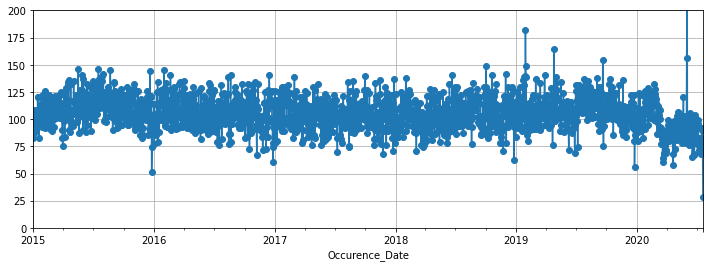

In [78]:
all_crime.groupby(pd.Grouper(freq = "D"))['Record_ID'].count().plot(marker = "o")
plt.grid()
plt.ylim(0, 200)

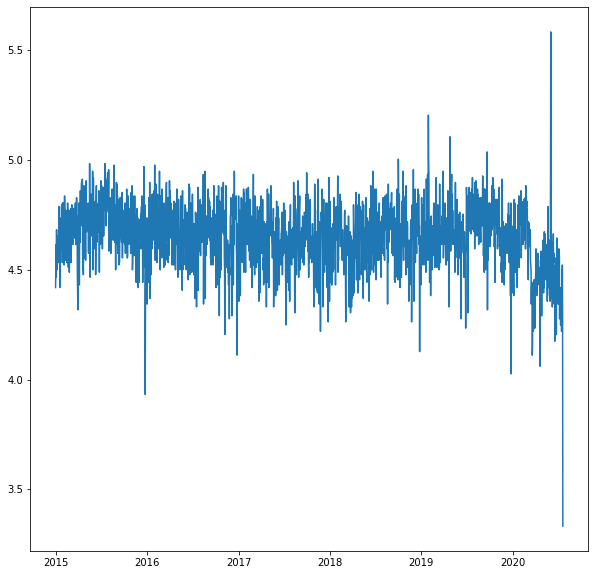

In [108]:
import numpy as np
plt.plot(np.log(crime_series))

In [112]:
## Auto correlation
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(all_crime.groupby(pd.Grouper(freq = "D"))['Record_ID'].count(), lags =100)
plot_acf(all_crime['2020-03':].groupby(pd.Grouper(freq = "D"))['Record_ID'].count(), lags =100)
plt.show()

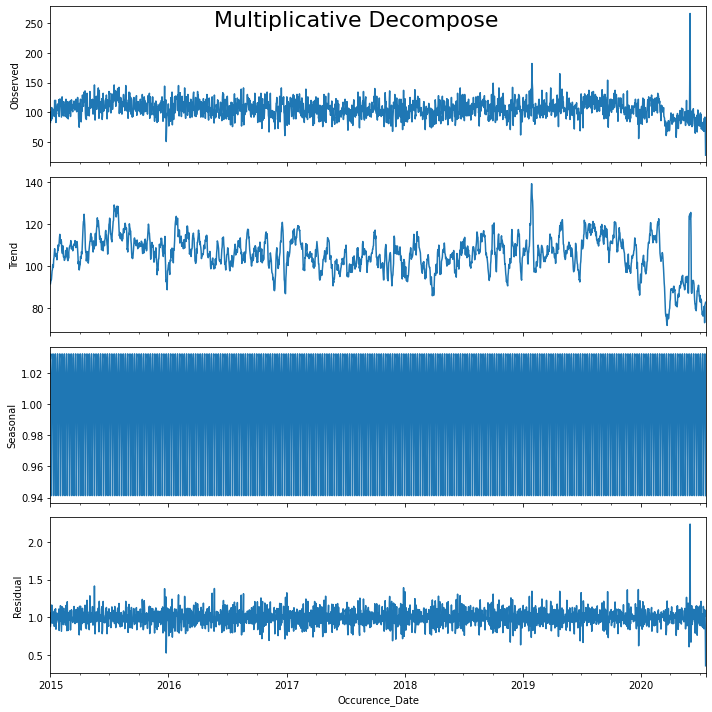

In [88]:
## Decompose data into noise, season and 
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

crime_series = all_crime.groupby(pd.Grouper(freq = "D"))['Record_ID'].count()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(crime_series, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(crime_series, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [14]:
crime = pd.read_sql_query("SELECT * FROM Sacramento_Crime_2018 \
                  UNION \
                  SELECT * FROM Sacramento_Crime_2019 \
                  UNION \
                  SELECT * FROM Sacramento_Crime_2020 \
                  ", connection)

In [102]:
crime[['Police_District', 'Beat', "Grid"]]

Police_District Beat  Grid
Occurence_Date                                   
2018/01/01 10:12:00+00               3   3B  0747
2019/01/01 08:58:00+00               3   3B  0736
2020/01/01 08:17:00+00               6   6B  1401
2018/01/01 09:39:00+00               3   3B  0746
2019/01/01 08:35:00+00               6   6D  0824
...                                ...  ...   ...
2019/06/15 15:00:00+00               2   2B  0531
2019/03/05 18:40:00+00               6   6A  1051
2019/09/15 14:41:00+00               5   5A  1398
2019/08/18 19:30:00+00               6   6C  1142
2019/11/05 10:30:00+00               6   6D  0841

[96896 rows x 3 columns]

In [ ]:
Which day
crime.Occurence_date

### Data Cleaning

In [8]:
#crime analysis
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96896 entries, 0 to 96895
Data columns (total 10 columns):
OBJECTID            96896 non-null int64
Record_ID           96896 non-null int64
Offense_Code        96896 non-null int64
Offense_Ext         96896 non-null object
Offense_Category    96896 non-null object
Description         96896 non-null object
Police_District     96878 non-null object
Beat                96880 non-null object
Grid                96878 non-null object
Occurence_Date      96896 non-null object
dtypes: int64(3), object(7)
memory usage: 7.4+ MB


- Police District, beat and grid have missing values

In [9]:
crime.head()

OBJECTID  Record_ID  Offense_Code Offense_Ext Offense_Category  \
0         1    1287392          5404         000          TRAFFIC   
1         1    1359411          1315          15      AGG ASSAULT   
2         1    1429759          5213           4   WEAPON OFFENSE   
3         2    1287393          1313          19          BATTERY   
4         2    1359412          2202           0         BURGLARY   

                      Description Police_District Beat  Grid  \
0            23152(A) DUI ALCOHOL               3   3B  0747   
1  244 PC ASSAULT W/ CAUST CHEMIC               3   3B  0736   
2    246 PC SHOOT OCCUP DWELL/VEH               6   6B  1401   
3         242 PC BATTERY CIVILIAN               3   3B  0746   
4     459 PC BURG RESIDENCE-FORCE               6   6D  0824   

           Occurence_Date  
0  2018/01/01 10:12:00+00  
1  2019/01/01 08:58:00+00  
2  2020/01/01 08:17:00+00  
3  2018/01/01 09:39:00+00  
4  2019/01/01 08:35:00+00

In [10]:
crime['Occurence_Date'] = pd.to_datetime(crime.Occurence_Date)

In [11]:
crime.dtypes

OBJECTID                          int64
Record_ID                         int64
Offense_Code                      int64
Offense_Ext                      object
Offense_Category                 object
Description                      object
Police_District                  object
Beat                             object
Grid                             object
Occurence_Date      datetime64[ns, UTC]
dtype: object

In [12]:
crime.head(2)

OBJECTID  Record_ID  Offense_Code Offense_Ext Offense_Category  \
0         1    1287392          5404         000          TRAFFIC   
1         1    1359411          1315          15      AGG ASSAULT   

                      Description Police_District Beat  Grid  \
0            23152(A) DUI ALCOHOL               3   3B  0747   
1  244 PC ASSAULT W/ CAUST CHEMIC               3   3B  0736   

             Occurence_Date  
0 2018-01-01 10:12:00+00:00  
1 2019-01-01 08:58:00+00:00

In [13]:
crime.drop(columns = ['OBJECTID'], inplace = True)
crime.columns

Index(['Record_ID', 'Offense_Code', 'Offense_Ext', 'Offense_Category',
       'Description', 'Police_District', 'Beat', 'Grid', 'Occurence_Date'],
      dtype='object')

In [14]:
crime.describe(include='all')

Record_ID  Offense_Code Offense_Ext Offense_Category  \
count   9.689600e+04  96896.000000       96896            96896   
unique           NaN           NaN         170               66   
top              NaN           NaN           0         BURGLARY   
freq             NaN           NaN       27146            16576   
first            NaN           NaN         NaN              NaN   
last             NaN           NaN         NaN              NaN   
mean    1.378805e+06   3479.869004         NaN              NaN   
std     5.054389e+04   1729.212419         NaN              NaN   
min     1.287392e+06    302.000000         NaN              NaN   
25%     1.336066e+06   2299.000000         NaN              NaN   
50%     1.379268e+06   2404.000000         NaN              NaN   
75%     1.422156e+06   5400.000000         NaN              NaN   
max     1.467949e+06   7399.000000         NaN              NaN   

                Description Police_District   Beat   Grid  \
count                 96896           96878  96880  96878   
unique                  578               7     24    573   
top     459 PC BURG VEHICLE               6     3B   0746   
freq                   9141           19892   6838   1085   
first                   NaN             NaN    NaN    NaN   
last                    NaN             NaN    NaN    NaN   
mean                    NaN             NaN    NaN    NaN   
std                     NaN             NaN    NaN    NaN   
min                     NaN             NaN    NaN    NaN   
25%                     NaN             NaN    NaN    NaN   
50%                     NaN             NaN    NaN    NaN   
75%                     NaN             NaN    NaN    NaN   
max                     NaN             NaN    NaN    NaN   

                   Occurence_Date  
count                       96896  
unique                      81934  
top     2019-11-24 07:59:00+00:00  
freq                           17  
first   2018-01-01 08:00:00+00:00  
last    2020-07-19 06:32:00+00:00  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN

In [15]:
crime['year'] = crime.Occurence_Date.dt.year
crime['month'] = crime.Occurence_Date.dt.month
crime['date'] = crime.Occurence_Date.dt.date
crime['dayofyear'] = crime.Occurence_Date.dt.dayofyear
crime.set_index('Occurence_Date', inplace = True)

In [16]:
crime

Record_ID  Offense_Code Offense_Ext  \
Occurence_Date                                                   
2018-01-01 10:12:00+00:00    1287392          5404         000   
2019-01-01 08:58:00+00:00    1359411          1315          15   
2020-01-01 08:17:00+00:00    1429759          5213           4   
2018-01-01 09:39:00+00:00    1287393          1313          19   
2019-01-01 08:35:00+00:00    1359412          2202           0   
...                              ...           ...         ...   
2019-06-15 15:00:00+00:00    1461490          2399          32   
2019-03-05 18:40:00+00:00    1463980          2399           2   
2019-09-15 14:41:00+00:00    1464805          5213          5B   
2019-08-18 19:30:00+00:00    1465222          1313          19   
2019-11-05 10:30:00+00:00    1466290          2999          02   

                          Offense_Category                     Description  \
Occurence_Date                                                               
2018-01-01 10:12:00+00:00          TRAFFIC            23152(A) DUI ALCOHOL   
2019-01-01 08:58:00+00:00      AGG ASSAULT  244 PC ASSAULT W/ CAUST CHEMIC   
2020-01-01 08:17:00+00:00   WEAPON OFFENSE    246 PC SHOOT OCCUP DWELL/VEH   
2018-01-01 09:39:00+00:00          BATTERY         242 PC BATTERY CIVILIAN   
2019-01-01 08:35:00+00:00         BURGLARY     459 PC BURG RESIDENCE-FORCE   
...                                    ...                             ...   
2019-06-15 15:00:00+00:00          LARCENY  487(D)(2) GRAND THFT GUN <$950   
2019-03-05 18:40:00+00:00          LARCENY              484 PC PETTY THEFT   
2019-09-15 14:41:00+00:00   WEAPON OFFENSE   246.3(A) NEGL DISCH FIREARM-M   
2019-08-18 19:30:00+00:00          BATTERY         242 PC BATTERY CIVILIAN   
2019-11-05 10:30:00+00:00        VANDALISM    594(B)(1) VANDAL OVER $400-F   

                          Police_District Beat  Grid  year  month        date  \
Occurence_Date                                                                  
2018-01-01 10:12:00+00:00               3   3B  0747  2018      1  2018-01-01   
2019-01-01 08:58:00+00:00               3   3B  0736  2019      1  2019-01-01   
2020-01-01 08:17:00+00:00               6   6B  1401  2020      1  2020-01-01   
2018-01-01 09:39:00+00:00               3   3B  0746  2018      1  2018-01-01   
2019-01-01 08:35:00+00:00               6   6D  0824  2019      1  2019-01-01   
...                                   ...  ...   ...   ...    ...         ...   
2019-06-15 15:00:00+00:00               2   2B  0531  2019      6  2019-06-15   
2019-03-05 18:40:00+00:00               6   6A  1051  2019      3  2019-03-05   
2019-09-15 14:41:00+00:00               5   5A  1398  2019      9  2019-09-15   
2019-08-18 19:30:00+00:00               6   6C  1142  2019      8  2019-08-18   
2019-11-05 10:30:00+00:00               6   6D  0841  2019     11  2019-11-05   

                           dayofyear  
Occurence_Date                        
2018-01-01 10:12:00+00:00          1  
2019-01-01 08:58:00+00:00          1  
2020-01-01 08:17:00+00:00          1  
2018-01-01 09:39:00+00:00          1  
2019-01-01 08:35:00+00:00          1  
...                              ...  
2019-06-15 15:00:00+00:00        166  
2019-03-05 18:40:00+00:00         64  
2019-09-15 14:41:00+00:00        258  
2019-08-18 19:30:00+00:00        230  
2019-11-05 10:30:00+00:00        309  

[96896 rows x 12 columns]

In [17]:
crime.groupby('Offense_Code')['Offense_Category'].unique().to_dict()

{302: array(['FRAUD'], dtype=object),
 909: array(['HOMICIDE'], dtype=object),
 910: array(['HOMICIDE'], dtype=object),
 999: array(['HOMICIDE'], dtype=object),
 1203: array(['ROBBERY'], dtype=object),
 1210: array(['ROBBERY'], dtype=object),
 1211: array(['ROBBERY'], dtype=object),
 1212: array(['ROBBERY'], dtype=object),
 1299: array(['ROBBERY'], dtype=object),
 1310: array(['AGG ASSAULT', 'ASSAULT'], dtype=object),
 1313: array(['BATTERY', 'ASSAULT'], dtype=object),
 1315: array(['AGG ASSAULT', 'ASSAULT', 'BATTERY'], dtype=object),
 1399: array(['BATTERY', 'ASSAULT'], dtype=object),
 2099: array(['ARSON', 'FIRE'], dtype=object),
 2202: array(['BURGLARY'], dtype=object),
 2203: array(['BURGLARY'], dtype=object),
 2204: array(['BURGLARY'], dtype=object),
 2205: array(['BURGLARY'], dtype=object),
 2206: array(['BURGLARY'], dtype=object),
 2299: array(['BURGLARY', 'BURGLARY VEH'], dtype=object),
 2301: array(['LARCENY'], dtype=object),
 2302: array(['LARCENY'], dtype=object),
 2303: arr

In [18]:
crime['general_category'] = crime['Offense_Category']
crime.general_category[crime.general_category.str.startswith("NARCO")] = "NARCOTICS"
crime.general_category[crime.general_category.str.startswith("DANG")] = "NARCOTICS"
crime.general_category[crime.general_category.str.startswith("TRAFF")] = "TRAFFIC"
crime.general_category[crime.general_category == 'ARSON'] = "FIRE"
crime.general_category[crime.general_category.str.startswith("THEFT")] = "LARCENY"
crime.general_category[crime.general_category.str.startswith("GRAND THEFT")] = "LARCENY"
crime.general_category[crime.general_category.str.contains("TREPASS|PRIVACY")]  = "TRESPASS"
crime.general_category[crime.general_category.str.contains("AUTO THEFT|BAIT CAR")] = "STOLEN VEHICLE"
crime.general_category[crime.general_category.str.contains("OBSTRUCT")] = "OBSTRUCT"
crime.general_category[crime.general_category.str.contains("BURGLARY")] = "BURGLARY"
crime.general_category[crime.general_category.str.contains('VANDALISM|GRAFFITI|TAMPERING')] = 'VANDALISM|GRAFFITI|TAMPERING'
crime.general_category[crime.general_category.str.contains('WEAPON')] = "WEAPON/WEAPON OFFENSE"
crime.general_category[crime.general_category.str.contains('CITY ORD')] = "CITY ORDINANCE"

In [19]:
## search for duplicated records
print(f"Total number of unique records {crime.Record_ID.nunique()}")
print(f"Total number of records in the table {crime.shape[0]}")

Total number of unique records 96609
Total number of records in the table 96896


Are record ID unique number for every reported crime? Let us check whether there are any duplicates

In [20]:
crime[crime.duplicated()]
print(f"Total number of duplciated records: {crime[crime.duplicated()].shape[0]}")
crime_orginial = crime.copy()

Total number of duplciated records: 286


#### Removing all the duplicated data

In [21]:
crime_clean = crime.drop_duplicates()
crime_clean.Record_ID[crime_clean.Record_ID.duplicated()]

crime_clean[crime_clean.Record_ID == 1464805]

Record_ID  Offense_Code Offense_Ext  \
Occurence_Date                                                   
2020-07-13 16:00:00+00:00    1464805          5213          5B   
2019-09-15 14:41:00+00:00    1464805          5213          5B   

                          Offense_Category                    Description  \
Occurence_Date                                                              
2020-07-13 16:00:00+00:00   WEAPON OFFENSE  246.3(A) NEGL DISCH FIREARM-M   
2019-09-15 14:41:00+00:00   WEAPON OFFENSE  246.3(A) NEGL DISCH FIREARM-M   

                          Police_District Beat  Grid  year  month        date  \
Occurence_Date                                                                  
2020-07-13 16:00:00+00:00               5   5A  1398  2020      7  2020-07-13   
2019-09-15 14:41:00+00:00               5   5A  1398  2019      9  2019-09-15   

                           dayofyear       general_category  
Occurence_Date                                               
2020-07-13 16:00:00+00:00        195  WEAPON/WEAPON OFFENSE  
2019-09-15 14:41:00+00:00        258  WEAPON/WEAPON OFFENSE

- There is one record that occurs twice with the same type of offense category and other features but they are reported for two different dates - July 2020 and Sept 2019
- Leaving it as it is for now

In [22]:
crime_new = crime_clean.copy()

### Exploratory data analysis

#### How is COVID-19 effecting the crime in the city of Sacramento?

- Does the number of crime reported varies pre and post COVID-19?
- What is the average number of crime per day before and after COVID-19?
- Which crime category is the frequently reported before and after COVID-19?



#### Does the number of crime reported varies pre and post COVID-19?
    - Plot 5-months of raw data before and aftre COVID-19
    - Plot rolling mean with a window size of 7 days

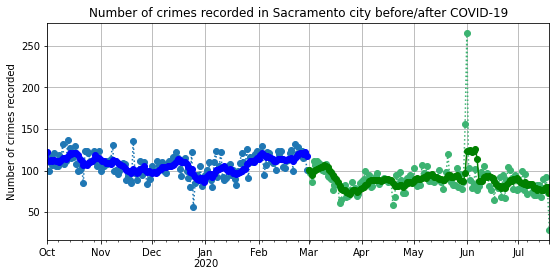

In [472]:
# Number of crime recorded by date
plt.rcParams["figure.figsize"] = [9,4]
crimemonth = crime_new.groupby(pd.Grouper(freq='D'))['Record_ID'].count()
crimemonth['2019-10': '2020-02'].plot(marker = "o", linestyle = ":", label = '5 months before COVID')
crimemonth['2020-03': '2020-08'].plot(marker = "o", linestyle = ":", label = '5 months post COVID', color = "mediumseagreen")
crimemonth['2019-10': '2020-02'].rolling('7D').mean().plot(marker = "o", label = 'rolling weekly mean', color = "blue")
crimemonth['2020-03': '2020-08'].rolling('7D').mean().plot(marker = "o", label = 'rolling weekly mean', color = "green")
plt.title("Number of crimes recorded in Sacramento city before/after COVID-19")
plt.xlabel("")
plt.ylabel("Number of crimes recorded")
plt.grid()

In [533]:
### Mean number of cases reported before and after COVID-19
number_crime = crimemonth['2019-10': '2020-07'].resample('5M', how = ['mean', 'std', 'count'], closed = 'left')
number_crime

mean        std  count
Occurence_Date                                         
2020-02-29 00:00:00+00:00  107.503311  13.457030    151
2020-07-31 00:00:00+00:00   88.563380  20.308425    142

In [543]:
# Are these means statistically different?
## Two sample Welch test - one sided

# Ho: Mean pre-COVID] same as Mean Post-COVID
# H1: Mean Pre-COVID > 

import scipy
tstat, pval = scipy.stats.ttest_ind(crimemonth['2019-10': '2020-02'], crimemonth['2020-03': '2020-07'], equal_var = False)
print(f"T-statistic: {tstat/2} and p-value: {pval/2}")
if pval/2 <0.1:
    print("Reject the Null hypothesis that the average number of crimes post COVID is same as pre-COVID")
if tstat/2 > 0 :
    print("Mean of the number of crimes pre-COVID is greater than that of post-COVID")

T-statistic: 4.6747845658254565 and p-value: 3.23495748412214e-18
Reject the Null hypothesis that the average number of crimes post COVID is same as pre-COVID
Mean of the number of crimes pre-COVID is greater than that of post-COVID


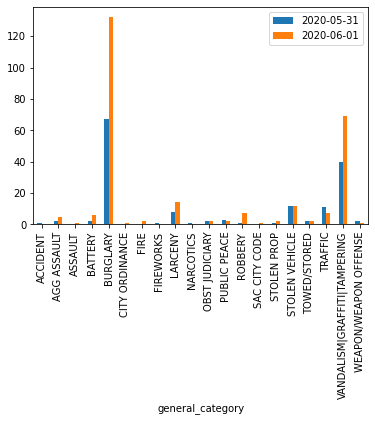

In [24]:
## What is the peak corresponds in June post COVID? Why there is high number of records? 

## Looking at these two days by crime category
crime_new['05-31-2020':'06-01-2020'].groupby(['general_category', crime_new['05-31-2020':'06-01-2020'].index.date])['Record_ID'].count().unstack().plot(kind = 'bar')

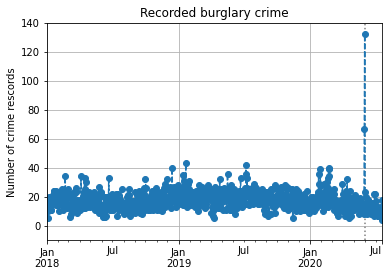

In [25]:
burglary = crime_new[crime_new.general_category == 'BURGLARY'].groupby(pd.Grouper(freq = 'D'))['Record_ID'].count()
burglary.plot(marker = "o", linestyle = "--")
plt.vlines(x = '06-01-2020', ymin = -10, ymax = 140, linestyle = ":", color = "grey")
plt.grid()
plt.title("Recorded burglary crime")
plt.xlabel("")
plt.ylabel("Number of crime rescords")
_ = plt.ylim(-10, 140)

 - The number of crimes reported per day decreased after COVID-19 and the city-wide shelter in place
 - On June 1, 2020 and May 31, 2020, the number of crimes reported is very high. This can be related with the George Flyod protest. On these days, the number of crimes reported was high for burglary, vandalism, graffitti and tampering. 
 - For instance, record high number of burglary cases was recorded on May 31st and June 1st , 2020: 67 and 132 cases respectively

#### What is the average number of crime per day before and after COVID-19?

Text(0.5, 1.0, 'Number of crimes reported in the city of Sacramento')

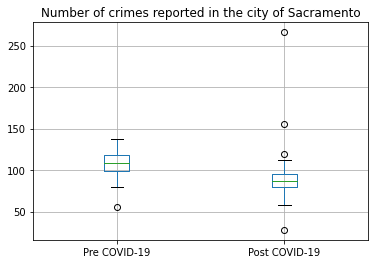

In [26]:
crime_dist = crime_new['2019-10':'2020-07'].groupby([pd.Grouper(freq = '5M', closed = 'left'),crime_new['2019-10':'2020-07'].index.date])['Record_ID'].count()
#crime_dist#.rename_axis(index=['Pre COVID-19', 'Post COVID-19'], inplace = True)
crime_dist.unstack(level=0).plot(kind = 'box')
plt.grid()
plt.xticks(ticks = [1 ,2] , labels = ['Pre COVID-19', 'Post COVID-19'])
plt.title("Number of crimes reported in the city of Sacramento")

In [27]:
print("The average number of crimes reported per day:")
print("Pre COVID-19:")
print(f"Mean: {crime_dist.unstack(level = 0).mean()[0]:.2f} and std dev: {crime_dist.unstack(level = 0).std()[0]:.2f}")
print("Post COVID-19:")
print(f"Mean: {crime_dist.unstack(level = 0).mean()[1]:.2f} and std dev: {crime_dist.unstack(level = 0).std()[1]:.2f}")

The average number of crimes reported per day:
Pre COVID-19:
Mean: 107.50 and std dev: 13.46
Post COVID-19:
Mean: 88.56 and std dev: 20.31


#### Which crime category is the frequently reported before and after COVID-19?

In [439]:
crime_grp_gat = crime_new['2019-10':'2020-07'].groupby([pd.Grouper(freq = '5M', closed = 'left'),
                                                        'general_category'])
crime_grp_gat['Record_ID'].count().nlargest(n=6)

Occurence_Date             general_category
2020-02-29 00:00:00+00:00  LARCENY             2867
                           BURGLARY            2794
                           TRAFFIC             2453
2020-07-31 00:00:00+00:00  BURGLARY            2163
                           LARCENY             2102
                           TRAFFIC             1579
Name: Record_ID, dtype: int64

- 5 months before COVID-19, the top 3 crime offense category were Larceny, Burglary and Traffic
- 5 months post COVID-19, the top 3 crime offense category were Burglary, Larceny and Traffic
- The same three categories remains in the top 3 list after COVID and shelter-in-place but with reduced number of records

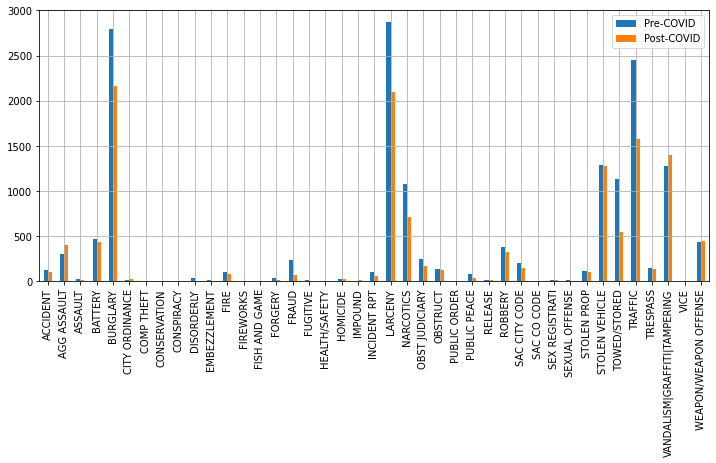

In [440]:
plt.rcParams["figure.figsize"]=[12,5]
ax = crime_grp_gat['Record_ID'].count().unstack(level = 0).plot(kind = 'bar')
ax.legend(("Pre-COVID", "Post-COVID"))
plt.xlabel("")
plt.grid()

#### How much does the crime has reduced before and after COVID-19 by crime type?

Calculating percentage change of crime type.. 

In [441]:
crime_grp_gat = crime_grp_gat['Record_ID'].count().unstack(level = 0)#['Percent_change'] = crime_grp_gat['Record_ID'].count().unstack(level = 0).pct_change()
crime_grp_gat.fillna(0, inplace = True)
crime_grp_gat['pct_change'] = (-1*(crime_grp_gat['2020-02-29 00:00:00+00:00'] - 
                                crime_grp_gat['2020-07-31 00:00:00+00:00'])/crime_grp_gat['2020-02-29 00:00:00+00:00'])*100

# crime_grp_gat['Abs_difference'] = (crime_grp_gat['2020-07-31 00:00:00+00:00'] - 
#                                 crime_grp_gat['2020-02-29 00:00:00+00:00'])

# crime_grp_gat['times_difference'] = (crime_grp_gat['2020-02-29 00:00:00+00:00']/
#                                 crime_grp_gat['2020-07-31 00:00:00+00:00'])

crime_grp_gat['pct_change'].plot(kind = 'bar', color=(crime_grp_gat['pct_change'] < 0).map({True: 'g',
                                                    False: 'r'}))
plt.title("Percentage change in crime type pre/post COVID-19")
plt.ylabel("Percentage change")
plt.xlabel("")
plt.grid()

In [469]:

#sns.bar
# plt.rcParams["figure.figsize"] = [7,9]
# crime_grp_gat['pct_change'].plot(kind = 'barh')
# plt.title("Percentage change in crime type pre/post COVID-19")
# plt.ylabel("Percentage change")
# plt.xlabel("")
# plt.grid()

#crime_grp_gat.sort_values(by = 'pct_change',inplace = True)
plt.rcParams["figure.figsize"] = [5,10]
crime_grp_gat['pct_change'][:-2].plot(kind = 'barh', color=(crime_grp_gat['pct_change'][:-2] < 0).map({True: 'g',
                                                    False: 'r'}))
plt.title("Percentage change in crime type post COVID-19")
plt.xlabel("Percentage change")
plt.ylabel("")
plt.xlim(-125, 125)
plt.grid(axis = 'y', linestyle = ":")


In [491]:
crime_grp_gat

Occurence_Date                2020-02-29 00:00:00+00:00  \
general_category                                          
COMP THEFT                                          1.0   
SAC CO CODE                                         1.0   
CONSPIRACY                                          1.0   
SEXUAL OFFENSE                                     18.0   
DISORDERLY                                         36.0   
FUGITIVE                                           14.0   
EMBEZZLEMENT                                       10.0   
FRAUD                                             240.0   
FISH AND GAME                                       3.0   
PUBLIC PEACE                                       85.0   
FORGERY                                            42.0   
TOWED/STORED                                     1137.0   
PUBLIC ORDER                                        8.0   
HEALTH/SAFETY                                       2.0   
INCIDENT RPT                                      104.0   
TRAFFIC                                          2453.0   
NARCOTICS                                        1078.0   
OBST JUDICIARY                                    250.0   
SAC CITY CODE                                     208.0   
ASSAULT                                            26.0   
LARCENY                                          2867.0   
BURGLARY                                         2794.0   
ACCIDENT                                          126.0   
FIRE                                              101.0   
SEX REGISTRATI                                     19.0   
ROBBERY                                           381.0   
STOLEN PROP                                       115.0   
OBSTRUCT                                          137.0   
BATTERY                                           470.0   
TRESPASS                                          143.0   
STOLEN VEHICLE                                   1284.0   
WEAPON/WEAPON OFFENSE                             435.0   
VANDALISM|GRAFFITI|TAMPERING                     1282.0   
RELEASE                                            10.0   
HOMICIDE                                           21.0   
AGG ASSAULT                                       302.0   
CONSERVATION                                        3.0   
IMPOUND                                             8.0   
CITY ORDINANCE                                     17.0   
FIREWORKS                                           1.0   
VICE                                                0.0   

Occurence_Date                2020-07-31 00:00:00+00:00  pct_change  
general_category                                                     
COMP THEFT                                          0.0 -100.000000  
SAC CO CODE                                         0.0 -100.000000  
CONSPIRACY                                          0.0 -100.000000  
SEXUAL OFFENSE                                      1.0  -94.444444  
DISORDERLY                                          5.0  -86.111111  
FUGITIVE                                            2.0  -85.714286  
EMBEZZLEMENT                                        2.0  -80.000000  
FRAUD                                              75.0  -68.750000  
FISH AND GAME                                       1.0  -66.666667  
PUBLIC PEACE                                       37.0  -56.470588  
FORGERY                                            19.0  -54.761905  
TOWED/STORED                                      542.0  -52.330695  
PUBLIC ORDER                                        4.0  -50.000000  
HEALTH/SAFETY                                       1.0  -50.000000  
INCIDENT RPT                                       55.0  -47.115385  
TRAFFIC                                          1579.0  -35.629841  
NARCOTICS                                         710.0  -34.137291  
OBST JUDICIARY                                    166.0  -33.600000  
SAC CITY CODE                                     149.0  -28.3

In [489]:
crime_new[crime_new.general_category == 'VANDALISM|GRAFFITI|TAMPERING']['2020-05-31':'2020-06-02']['Record_ID']#.loc[~crime_new.index.isin(['2020-06-01', '2020-05-31'])]['Record_ID']

Occurence_Date
2020-05-31 06:57:00+00:00    1457116
2020-05-31 05:00:00+00:00    1457119
2020-05-31 08:11:00+00:00    1457124
2020-05-31 06:00:00+00:00    1457128
2020-05-31 10:00:00+00:00    1457184
                              ...   
2020-06-01 14:00:00+00:00    1463592
2020-06-01 04:15:00+00:00    1463952
2020-05-31 06:45:00+00:00    1463956
2020-06-02 17:35:00+00:00    1463990
2020-06-01 21:20:00+00:00    1466265
Name: Record_ID, Length: 123, dtype: int64

Text(0.5, 0, 'Percentage change of crime')

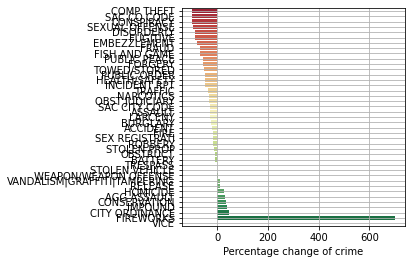

In [488]:
sns.barplot(x = "pct_change", y = crime_grp_gat.index, data = crime_grp_gat, palette="RdYlGn")
plt.grid()
plt.ylabel("")
plt.xlabel("Percentage change of crime")

In [283]:
print(crime_grp_gat[crime_grp_gat['pct_change'] > 0].sort_values(by = 'pct_change', ascending = False))
crime_post_covid_cat = crime_grp_gat[crime_grp_gat['pct_change'] > 0].index.values

Occurence_Date                2020-02-29 00:00:00+00:00  \
general_category                                          
VICE                                                0.0   
FIREWORKS                                           1.0   
CITY ORDINANCE                                     17.0   
IMPOUND                                             8.0   
CONSERVATION                                        3.0   
AGG ASSAULT                                       302.0   
HOMICIDE                                           21.0   
RELEASE                                            10.0   
VANDALISM|GRAFFITI|TAMPERING                     1282.0   
WEAPON/WEAPON OFFENSE                             435.0   

Occurence_Date                2020-07-31 00:00:00+00:00  pct_change  
general_category                                                     
VICE                                                1.0         inf  
FIREWORKS                                           8.0  700.000000  
CITY ORDINA

In [284]:
print("Most of the crime types has reduced after COIVD-19 and the shutdown except for the following categories")
print(crime_post_covid_cat)

Most of the crime types has reduced after COIVD-19 and the shutdown except for the following categories
['AGG ASSAULT' 'CITY ORDINANCE' 'CONSERVATION' 'FIREWORKS' 'HOMICIDE'
 'IMPOUND' 'RELEASE' 'VANDALISM|GRAFFITI|TAMPERING' 'VICE'
 'WEAPON/WEAPON OFFENSE']


- Almost all of these categories can be related to the consequences of the protest except homicide
- There are two known factors influencing the post COVID-19 crime rate: (a) COVID-19/SIP and (b) George Floyd protest. George Floyd occured after his death on May 25. So, comparing data before and after May 25 can give a clue.
- From the news we can see that there is another factor -- Police letting go most of the cases because of the outbreak of coronavirus. 

In [155]:
## How are the increased crime categories change before and after George Floyd death?

crime_post_covid = crime_new[crime_new.general_category.isin(crime_post_covid_cat)]['2020-03':]
crime_post_covid = crime_post_covid.groupby([crime_post_covid.index.date, 'general_category'])['Record_ID'].count()
crime_post_covid.unstack(level=1).plot(marker = "o", linestyle = ":")

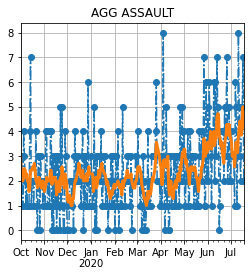

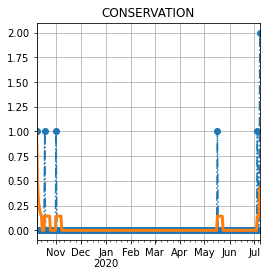

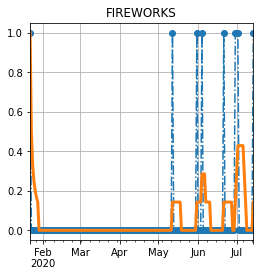

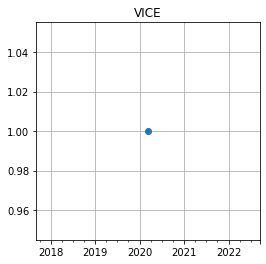

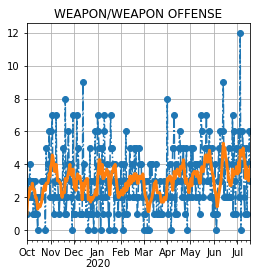

In [476]:
plt.rcParams["figure.figsize"] = [4,4] 
for cat in crime_post_covid_cat:
    crime_new[crime_new.general_category == cat]['2019-10':].groupby(pd.Grouper(freq = 'D'))['Record_ID'].count().plot(marker = "o", linestyle = "-.")
    crime_new[crime_new.general_category == cat]['2019-10':].groupby(pd.Grouper(freq = 'D'))['Record_ID'].count().rolling('7D').mean().plot(linestyle = "-", linewidth = 3),
    plt.title(cat)
    plt.xlabel("")
    plt.grid()
    plt.show()

- For the crime offense types - Vandalism, Graffiti and tampering, and city ordinance, its is very clear that these were high only during the protest time. So, the cause for increase in these two types can be attributed to the protest. (COVID-19 and SIP does not cause the increase in these two crimes)
- A clear increasing trend can be observed from the rolling mean for the category Agg Assault. While the cause cannot be differentiated between COVID and the protest, the number of cases increases even after July 15 - Indicates that COVID-SIP has an influence as well
- A slight increasing trend is observed for Weapon/weapon offense post COVID-19. 
- Fireworks needs to be compared with previous year's data
- The number of crimes increased only by one for the categories: Conservation (harm to animals, poaching, hunting, fishing, etc) and Release (releasing arrested person as peace officer is satisfied that there are insufficient grounds for making a criminal complaint against the person arrested)
- Impound - No specific trend with respect to protest -- Possibly - SIP - car parked in no-parking lot - lead to seizure/police custody?


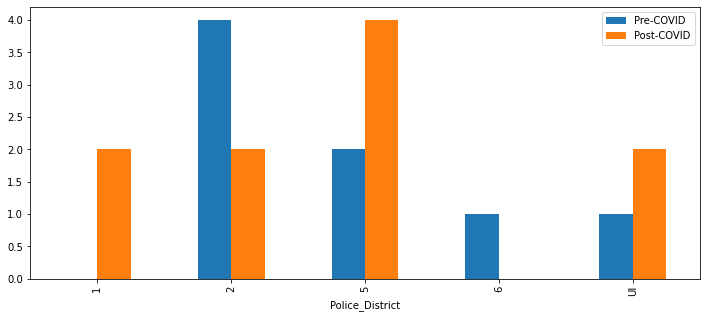

In [210]:
## Is Impound specific to one particular area? (may be a congested area?)
crime_impound_dist = crime_new[crime_new.general_category == 'IMPOUND']['2019-10':'2020-07']
crime_impound_dist = crime_impound_dist.groupby([pd.Grouper(freq = '5M', closed = 'left'),'Police_District'])['Record_ID'].count()
ax = crime_impound_dist.unstack(level = 0).plot(kind = 'bar')
ax.legend(['Pre-COVID', "Post-COVID"])

- Impound cases increased in Police district 1 and 5
- Are these police districts corresponds to high denisty areas? where parking is a issue?


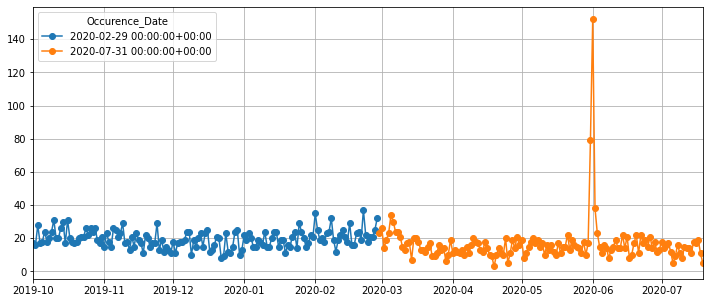

In [221]:
## Number of crimes by police district

crime_pd = crime_new[crime_new.Police_District == '3']['2019-10':'2020-07']
crime_pd = crime_pd.groupby([pd.Grouper(freq = '5M', closed = 'left'),crime_pd.index.date])['Record_ID'].count()
crime_pd.unstack(level = 0).plot(marker='o')
plt.grid()

#sns.FacetGrid(crime_pd.unstack(level = 0), )

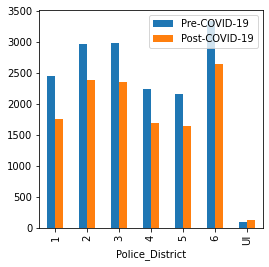

In [503]:
#crime_pd.unstack(level = 0)
crime_pd = crime_new['2019-10':'2020-07']
crime_pd = crime_pd.groupby([pd.Grouper(freq = '5M', closed = 'left'), 'Police_District'])['Record_ID'].count()
#sns.FacetGrid(crime_pd, 'Police_District').map(sns.pointplot(crime_pd.index()))
ax = crime_pd.unstack(level=0).plot(kind = 'bar')
ax.legend(['Pre-COVID-19', 'Post-COVID-19'])

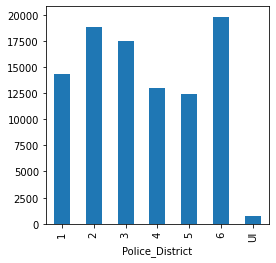

In [498]:
crime_new.groupby('Police_District')['Record_ID'].count().plot(kind = 'bar')

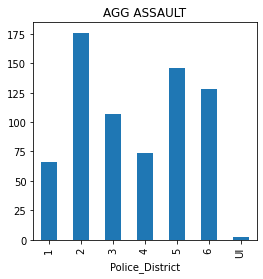

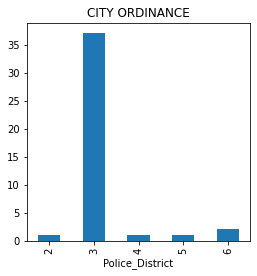

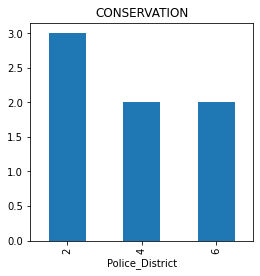

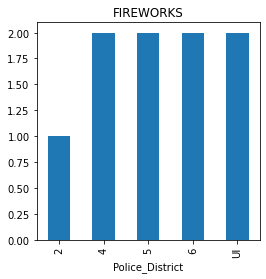

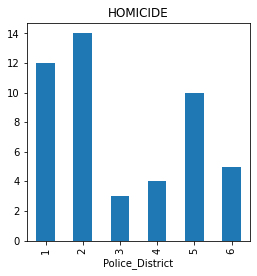

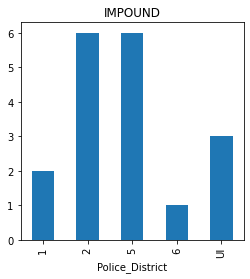

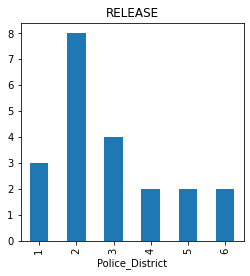

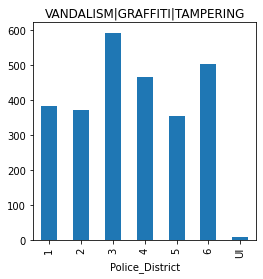

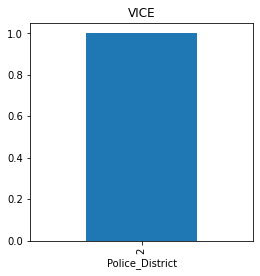

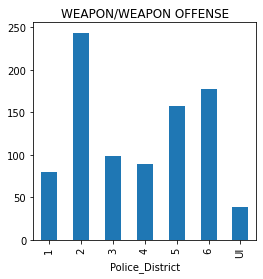

In [496]:
plt.rcParams["figure.figsize"]=[4,4]
for i in crime_post_covid_cat:
    plt.title(i)
    crime_new[crime_new.general_category == i]['2019-10':].groupby('Police_District')['Record_ID'].count().plot(kind ='bar')
    plt.show()

### EDA of 911 data

In [316]:
sql_query = "PRAGMA table_info(Sacramento_Dispatch_2020);"
pd.read_sql_query(sql_query, connection)

cid               name     type  notnull dflt_value  pk
0     0                  X     REAL        0       None   0
1     1                  Y     REAL        0       None   0
2     2           OBJECTID  INTEGER        0       None   0
3     3          Record_ID  INTEGER        0       None   0
4     4          Call_Type     TEXT        0       None   0
5     5        Description     TEXT        0       None   0
6     6  Reporting_Officer     TEXT        0       None   0
7     7            Unit_ID     TEXT        0       None   0
8     8     Report_Created     TEXT        0       None   0
9     9           Location     TEXT        0       None   0
10   10    Police_District     TEXT        0       None   0
11   11               Beat     TEXT        0       None   0
12   12               Grid     TEXT        0       None   0
13   13       X_Coordinate  INTEGER        0       None   0
14   14       Y_Coordinate  INTEGER        0       None   0
15   15        Day_of_Week     TEXT        0       None   0
16   16     Occurence_Date     TEXT        0       None   0
17   17      Received_Date     TEXT        0       None   0
18   18      Dispatch_Date     TEXT        0       None   0
19   19       Enroute_Date     TEXT        0       None   0
20   20      At_Scene_Date     TEXT        0       None   0
21   21         Clear_Date     TEXT        0       None   0

In [379]:
dispatch = pd.read_sql_query('SELECT RECORD_ID, Call_Type, Description, Police_District, \
                  Occurence_Date FROM Sacramento_Dispatch_2018 \
                  UNION \
                  SELECT RECORD_ID, Call_Type, Description, Police_District, \
                  Occurence_Date FROM Sacramento_Dispatch_2019 \
                  UNION \
                  SELECT RECORD_ID, Call_Type, Description, Police_District, \
                  Occurence_Date FROM Sacramento_Dispatch_2020;', connection)

In [380]:
dispatch.Occurence_Date  = pd.to_datetime(dispatch.Occurence_Date)
dispatch.describe(include='all')

Record_ID Call_Type          Description Police_District  \
count   8.844750e+05    884475               884475          865586   
unique           NaN       192                  191               7   
top              NaN       415  DISTURBANCE-CLARIFY               6   
freq             NaN    124766               124766          178939   
first            NaN       NaN                  NaN             NaN   
last             NaN       NaN                  NaN             NaN   
mean    7.431239e+06       NaN                  NaN             NaN   
std     3.544378e+05       NaN                  NaN             NaN   
min     6.816904e+06       NaN                  NaN             NaN   
25%     7.125266e+06       NaN                  NaN             NaN   
50%     7.430769e+06       NaN                  NaN             NaN   
75%     7.739136e+06       NaN                  NaN             NaN   
max     8.060314e+06       NaN                  NaN             NaN   

                   Occurence_Date  
count                      884475  
unique                     878655  
top     2019-09-25 01:00:00+00:00  
freq                           62  
first   2018-01-01 08:00:01+00:00  
last    2020-07-12 06:56:48+00:00  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN

In [381]:
dispatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884475 entries, 0 to 884474
Data columns (total 5 columns):
Record_ID          884475 non-null int64
Call_Type          884475 non-null object
Description        884475 non-null object
Police_District    865586 non-null object
Occurence_Date     884475 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 33.7+ MB


In [382]:
### Duplicates/missing data
print(f"% missing records: {1 - (dispatch.shape[0]*4 + (dispatch.shape[0] - dispatch.Police_District.isnull().sum()))/(dispatch.shape[0]*5):.4f}")
print("How many duplicate values are there in this dataset?", dispatch.duplicated().sum())

% missing records: 0.0043
How many duplicate values are there in this dataset? 0


In [383]:
dispatch.isnull().sum()

Record_ID              0
Call_Type              0
Description            0
Police_District    18889
Occurence_Date         0
dtype: int64

In [384]:
dispatch.set_index('Occurence_Date', inplace = True)

In [400]:
plt.rcParams["figure.figsize"] = [14,4]
dispatch_911_count = dispatch['2019-10':'2020-07'].groupby([pd.Grouper(freq = '5M', closed = 'left'),dispatch['2019-10':'2020-07'].index.date])['Record_ID'].count()
ax = dispatch_911_count.unstack(level = 0).plot(marker="o", linestyle = "-")
#dispatch_911_count.rolling(7).mean().unstack(level = 0).plot()
ax.legend(['Pre-COVID','Post-COVID'])
plt.grid()

In [410]:
crime_dispatch = pd.DataFrame({'calls_911':dispatch_911_count, 'crime':crime_dist })
crime_dispatch.rename_axis(index = ['covid', 'Date'], inplace = True)

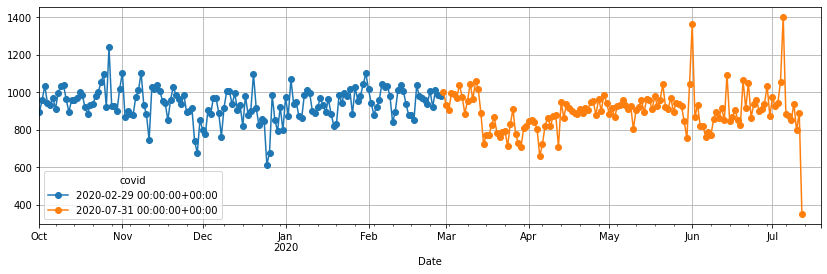

In [423]:
crime_dispatch.calls_911.unstack(level=0).plot(marker="o")
plt.grid()
plt.show()
crime_dispatch.crime.unstack(level=0).plot(marker="o")
plt.grid()
plt.show()


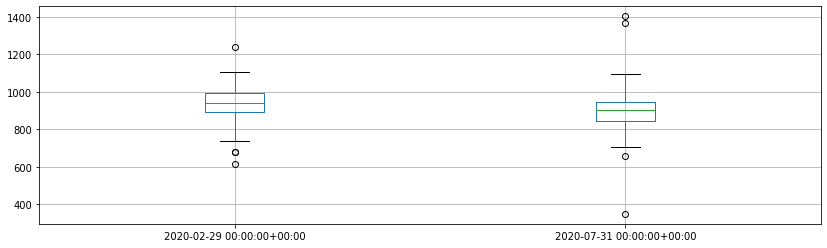

In [428]:
crime_dispatch.calls_911.unstack(level=0).plot(kind = 'box')
plt.grid()

In [436]:
dispatch_type = dispatch['2019-10':'2020-07'].groupby([pd.Grouper(freq = '5M', closed = 'left'),'Description'])['Record_ID'].count()
dispatch_type.nlargest(20)

Occurence_Date             Description                                
2020-02-29 00:00:00+00:00  DISTURBANCE-CLARIFY                            21808
2020-07-31 00:00:00+00:00  DISTURBANCE-CLARIFY                            19921
2020-02-29 00:00:00+00:00  TRAFFIC STOP                                   15549
2020-07-31 00:00:00+00:00  ALL UNITS BROADCAST                            12144
2020-02-29 00:00:00+00:00  ALL UNITS BROADCAST                            10481
2020-07-31 00:00:00+00:00  TRAFFIC STOP                                    9128
2020-02-29 00:00:00+00:00  INCOMPLETE CALL FOR POLICE                      8357
                           WELFARE CHECK                                   7611
2020-07-31 00:00:00+00:00  INCOMPLETE CALL FOR POLICE                      7505
                           WELFARE CHECK                                   6946
2020-02-29 00:00:00+00:00  SUSPICIOUS SUBJECT/CIRCUMSTANCE-IN PROGRESS     6521
2020-07-31 00:00:00+00:00  SUSPICIOUS SUBJECT/CIR

In [544]:
########

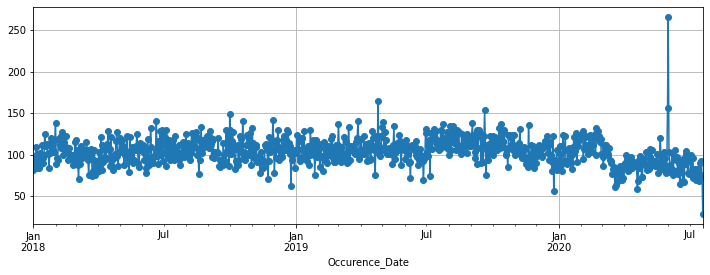

In [551]:
plt.rcParams["figure.figsize"] = [12,4]
crime_new.groupby(pd.Grouper(freq = "D"))['Record_ID'].count().plot(marker = "o")
plt.grid()

Mean and SD of pre-covid: (107.46052631578948, 13.378538183729866)
Mean and SD of post-covid: (88.47517730496453, 20.281208001946244)


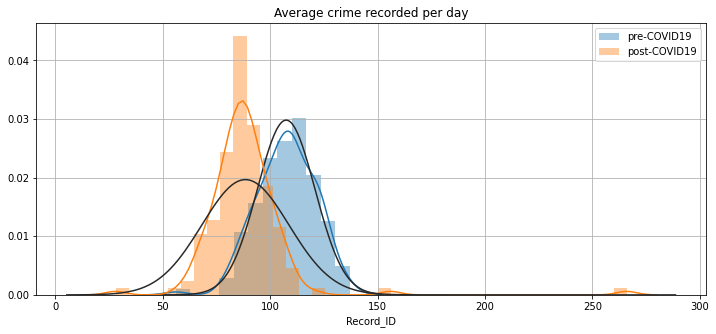

In [690]:
from scipy import stats
sns.distplot(crimemonth['2019-10': '2020-02'], label = "pre-COVID19", fit = stats.norm)
sns.distplot(crimemonth['2020-03': '2020-08'], label = "post-COVID19", fit = stats.norm)
plt.legend()
plt.title("Average crime recorded per day")
plt.grid()
print("Mean and SD of pre-covid:", stats.norm.fit(crimemonth['2019-10': '2020-02']))
print("Mean and SD of post-covid:", stats.norm.fit(crimemonth['2020-03': '2020-08']))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


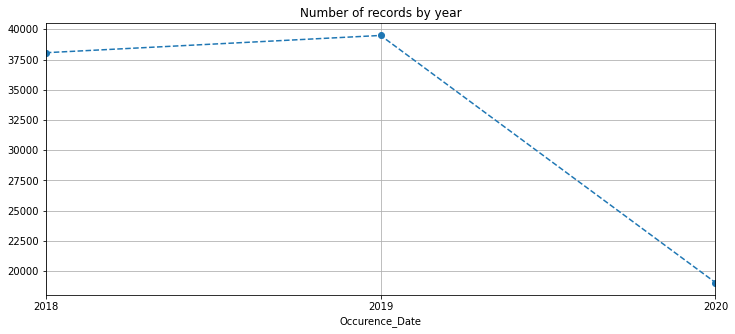

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


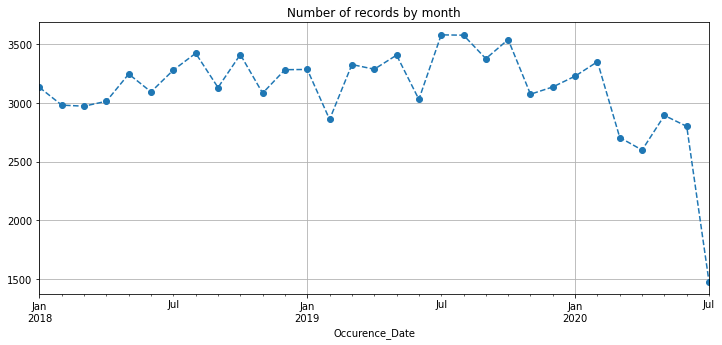

In [389]:


#Number of records by year
crime_new.groupby(pd.Grouper(freq='Y'))['Record_ID'].count().plot(marker = "o", linestyle = "--")
plt.grid()
plt.title("Number of records by year")
plt.show()

#Number of records by month
crime_new.groupby(pd.Grouper(freq='M'))['Record_ID'].count().plot(marker = "o", linestyle = "--")
plt.grid()
plt.title("Number of records by month")
plt.show()


In [649]:
crime_new.groupby([crime_new.index.year, crime_new.index.month])['Record_ID'].count().unstack(level=0).plot(marker = "o", linestyle = "--")
plt.grid()
plt.xlabel("Month of Year")
plt.ylabel("Total number of crimes recorded per month")

Text(0, 0.5, 'Total number of crimes recorded per month')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


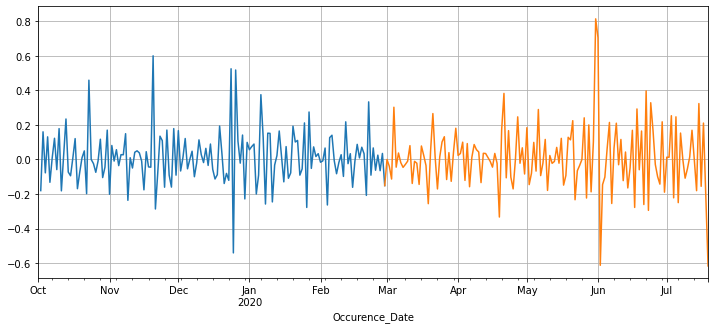

In [701]:
### Percentage decrease in crime recorded every week 

crimemonth['2019-10': '2020-02'].pct_change().plot()
crimemonth['2020-02-28': '2020-08'].pct_change().plot()
plt.grid()

In [481]:
crime_per_month = crime_new.groupby(pd.Grouper(freq = 'M'))['Record_ID'].count()
#crime_per_month[crime_per_month.index.month == 3].pct_change()
crime_per_month.pct_change(periods = 12)

Occurence_Date
2018-01-31 00:00:00+00:00         NaN
2018-02-28 00:00:00+00:00         NaN
2018-03-31 00:00:00+00:00         NaN
2018-04-30 00:00:00+00:00         NaN
2018-05-31 00:00:00+00:00         NaN
2018-06-30 00:00:00+00:00         NaN
2018-07-31 00:00:00+00:00         NaN
2018-08-31 00:00:00+00:00         NaN
2018-09-30 00:00:00+00:00         NaN
2018-10-31 00:00:00+00:00         NaN
2018-11-30 00:00:00+00:00         NaN
2018-12-31 00:00:00+00:00         NaN
2019-01-31 00:00:00+00:00    0.048835
2019-02-28 00:00:00+00:00   -0.040912
2019-03-31 00:00:00+00:00    0.119408
2019-04-30 00:00:00+00:00    0.090547
2019-05-31 00:00:00+00:00    0.049584
2019-06-30 00:00:00+00:00   -0.020679
2019-07-31 00:00:00+00:00    0.091436
2019-08-31 00:00:00+00:00    0.044977
2019-09-30 00:00:00+00:00    0.078544
2019-10-31 00:00:00+00:00    0.037504
2019-11-30 00:00:00+00:00   -0.002918
2019-12-31 00:00:00+00:00   -0.044762
2020-01-31 00:00:00+00:00   -0.017346
2020-02-29 00:00:00+00:00    0.1720

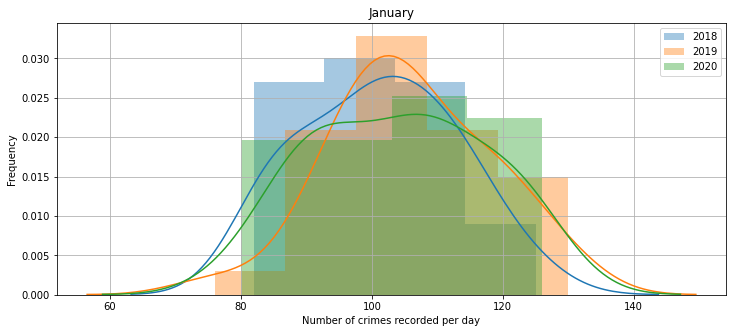

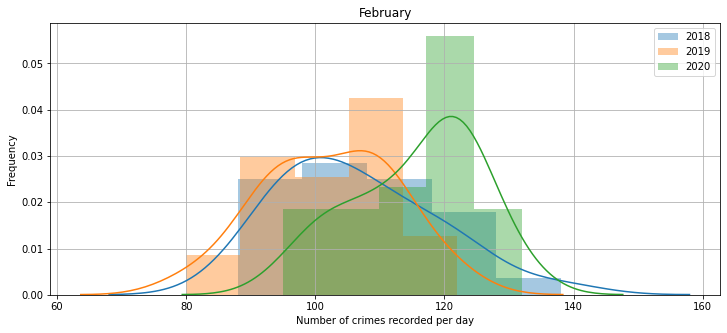

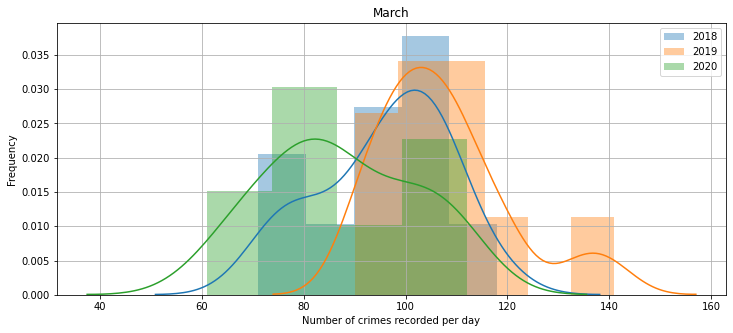

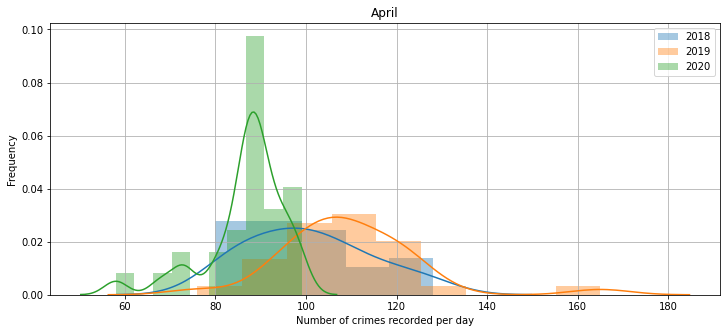

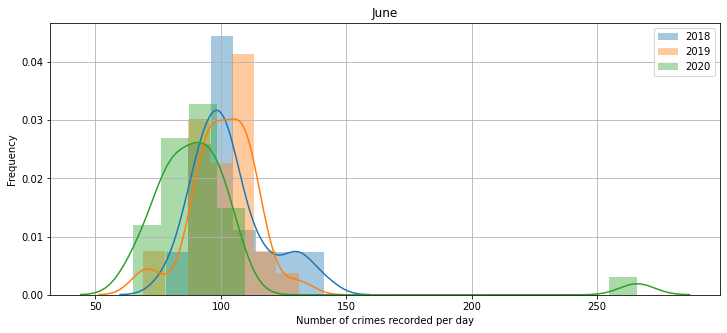

KeyError: '2020-8'

In [482]:
# Distribution of number of records per month comapred for every year
for month in crimemonth.index.month.unique():
    for year in crimemonth.index.year.unique():
        sns.distplot(crimemonth[str(year) + "-" + str(month)], label = year)
    plt.title(calendar.month_name[month])
    plt.xlabel("Number of crimes recorded per day")
    plt.ylabel("Frequency")
    plt.grid()
    plt.legend()
    plt.show()

In [630]:
#Average number of crime recorded per day in the city of Sacramento
avg_crime = crimemonth.groupby([crimemonth.index.year, crimemonth.index.month]).mean()

avg_crime.index.rename(['year', 'month'], inplace = True)
avg_crime.unstack(level=0).plot(kind = 'bar')
#avg_crime.reset_index().pivot_table('Record_ID','month','year').plot(kind = 'bar')


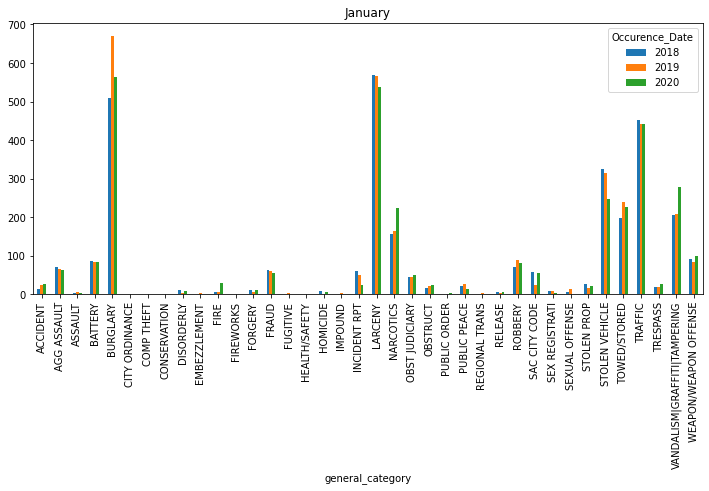

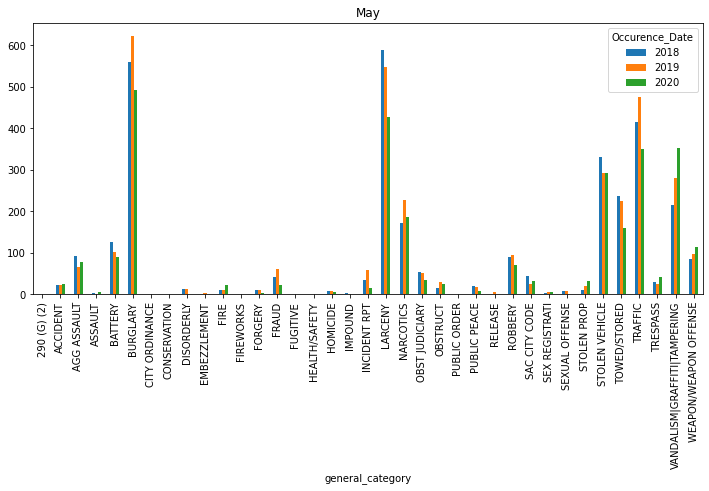

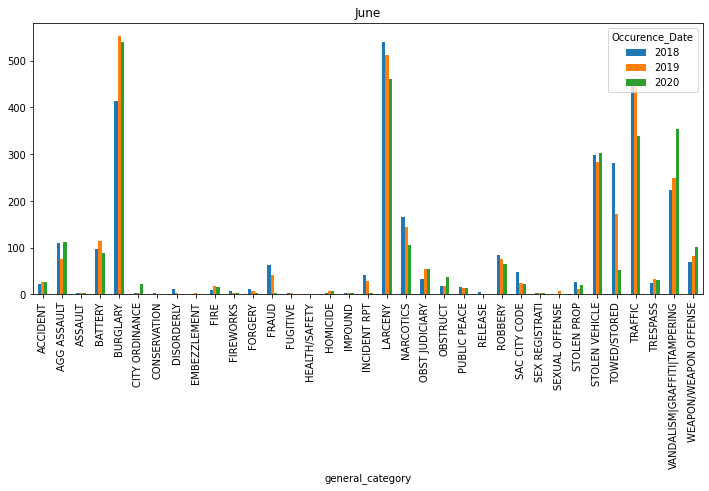

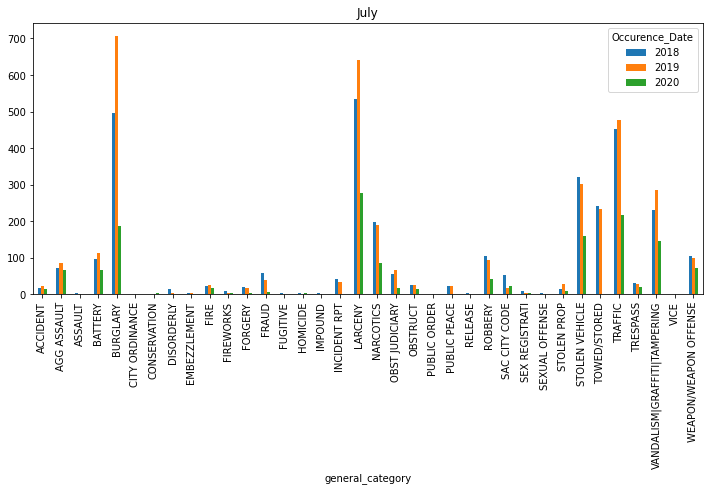

In [487]:
## type of crime in march-July

#crime.groupby(crime.index)
for m in range(1,8):
    crime_cat_march = crime_new[crime_new.index.month == m].groupby([crime_new[crime_new.index.month == m].index.year, 'general_category'])['Record_ID'].count()
    crime_cat_march.reset_index().pivot_table('Record_ID','general_category','Occurence_Date').plot(kind = 'bar')
    plt.title(calendar.month_name[m])
    plt.show()

Text(0.5, 0, '')

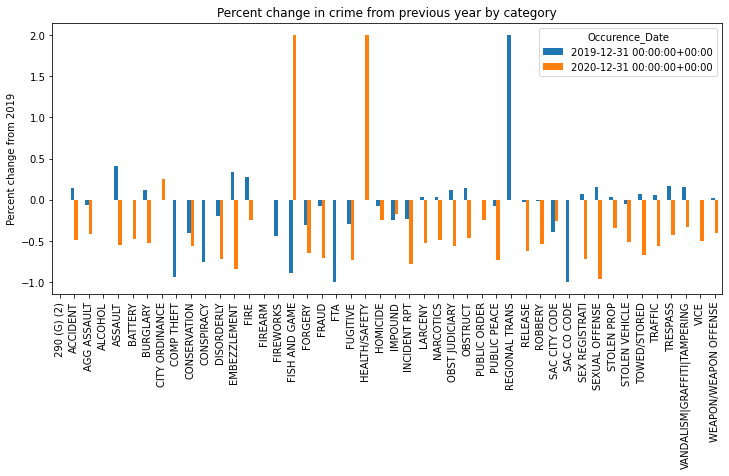

In [488]:
crime_category_pct_change = crime_new.groupby(['general_category', pd.Grouper(freq='Y')])['Record_ID'].count().pct_change()
crime_category_pct_change = crime_category_pct_change.reset_index().pivot_table('Record_ID', 'general_category', 'Occurence_Date')
crime_category_pct_change.iloc[:,1:].plot(kind = 'bar')
plt.ylabel("Percent change from 2019")
plt.title("Percent change in crime from previous year by category")
plt.xlabel("")
## This is comparison of all year 2019 to 7 months in January

Text(0.5, 0, '')

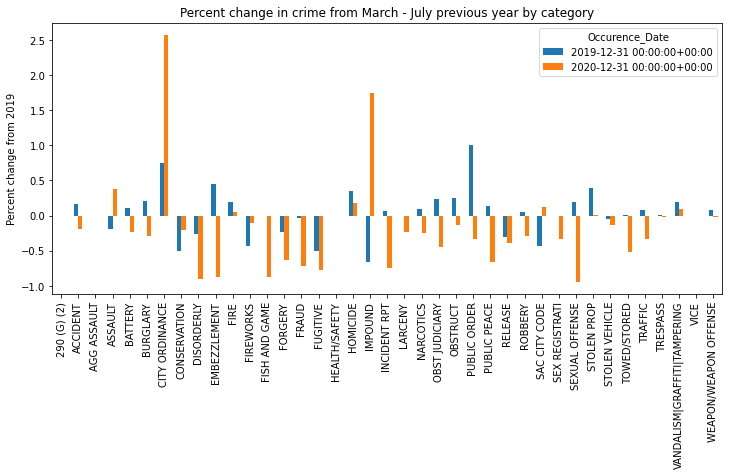

In [489]:
### Percent increase in crime by category from March to July. Date obtained by comparing with previous year

crime_category_pct_change = crime_new[(crime_new.index.month > 2) & (crime_new.index.month < 8)].groupby(['general_category', pd.Grouper(freq='Y')])['Record_ID'].count().pct_change()
crime_category_pct_change = crime_category_pct_change.reset_index().pivot_table('Record_ID', 'general_category', 'Occurence_Date')
crime_category_pct_change.iloc[:,1:].plot(kind = 'bar')
plt.ylabel("Percent change from 2019")
plt.title("Percent change in crime from March - July previous year by category")
plt.xlabel("")

In [490]:
### Percent increase in crime by category by month. Date obtained by comparing with previous year
for m in range(3,8):
    crime_category_pct_change = crime_new[(crime_new.index.month == m)].groupby(['general_category', pd.Grouper(freq='Y')])['Record_ID'].count().pct_change()
    crime_category_pct_change = crime_category_pct_change.reset_index().pivot_table('Record_ID', 'general_category', 'Occurence_Date')
    crime_category_pct_change.iloc[:,1:].plot(kind = 'bar')
    plt.title(calendar.month_name[m])
    plt.xlabel("")

In [491]:
crime_category = crime_new.groupby(['general_category', crime_new.index.year, crime_new.index.month])['Record_ID'].count()
crime_category.index.rename(['general_category', 'year', 'month'], inplace = True)
crime_category = crime_category.reset_index()
crime_category


general_category  year  month  Record_ID
0               290 (G) (2)  2018      5          1
1               290 (G) (2)  2019      5          1
2                  ACCIDENT  2018      1         15
3                  ACCIDENT  2018      2         20
4                  ACCIDENT  2018      3         20
...                     ...   ...    ...        ...
1026  WEAPON/WEAPON OFFENSE  2020      3         62
1027  WEAPON/WEAPON OFFENSE  2020      4         99
1028  WEAPON/WEAPON OFFENSE  2020      5        113
1029  WEAPON/WEAPON OFFENSE  2020      6        101
1030  WEAPON/WEAPON OFFENSE  2020      7         73

[1031 rows x 4 columns]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


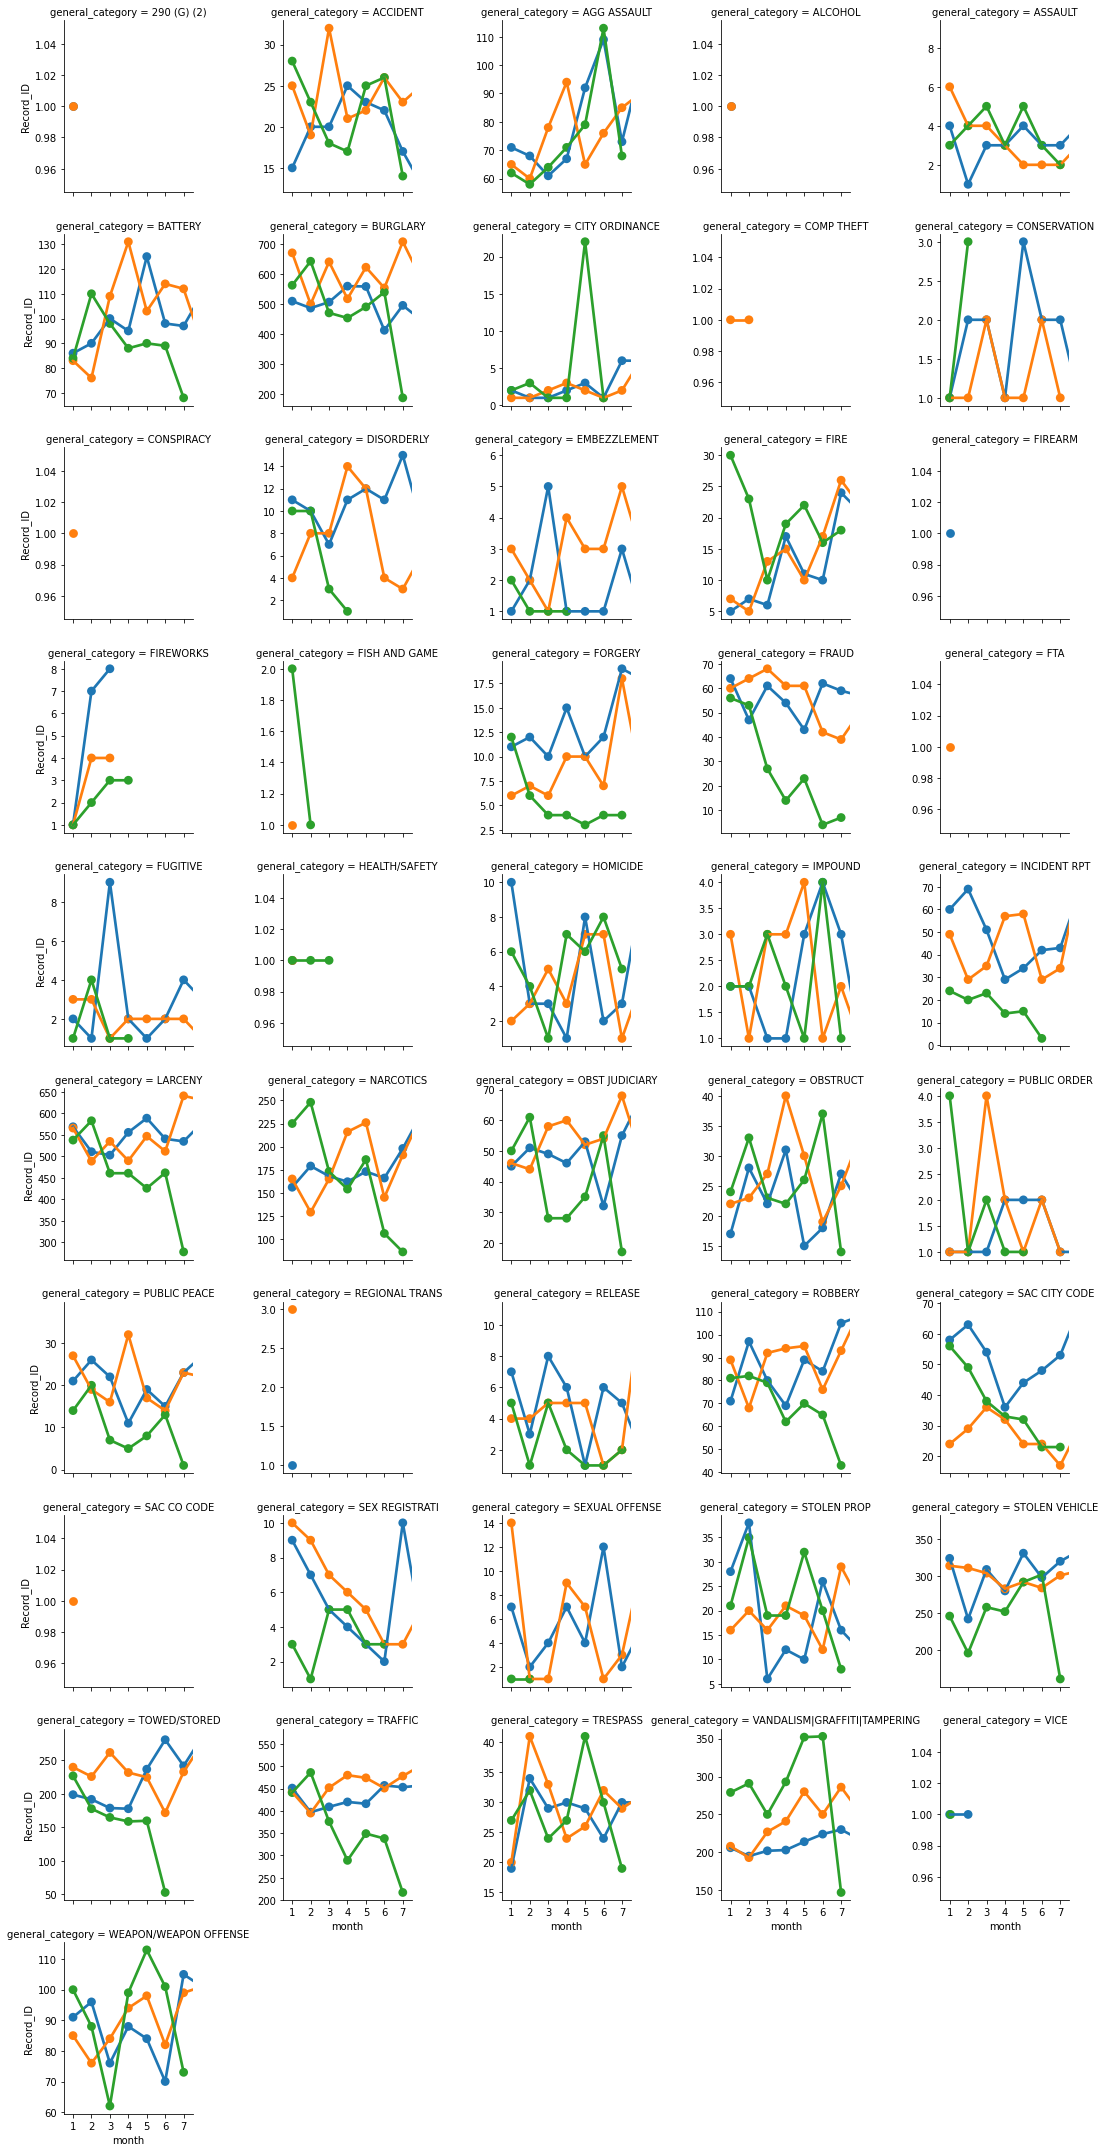

In [492]:
sns.FacetGrid(crime_category, col="general_category", hue="year", col_wrap=5, sharey = False).map(sns.pointplot, "month", "Record_ID", ci = None)

In [518]:
crime_cat_pd.reset_index()

general_category  Occurence_Date Police_District  Record_ID
0              290 (G) (2)            2018               6          1
1              290 (G) (2)            2019               6          1
2                 ACCIDENT            2018               1         33
3                 ACCIDENT            2018               2         65
4                 ACCIDENT            2018               3         36
..                     ...             ...             ...        ...
676  WEAPON/WEAPON OFFENSE            2020               3         69
677  WEAPON/WEAPON OFFENSE            2020               4         68
678  WEAPON/WEAPON OFFENSE            2020               5        114
679  WEAPON/WEAPON OFFENSE            2020               6        123
680  WEAPON/WEAPON OFFENSE            2020              UI         30

[681 rows x 4 columns]

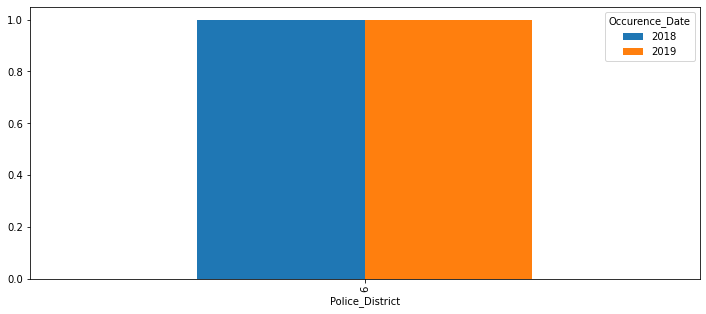

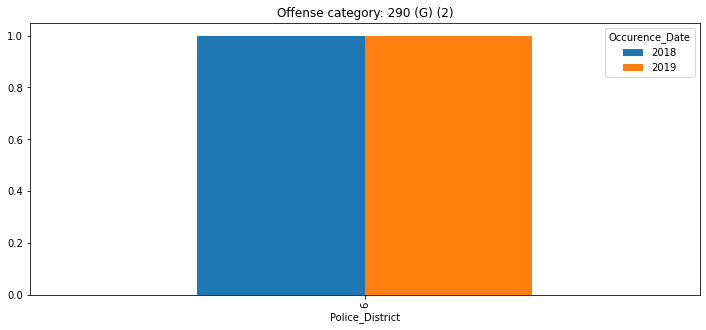

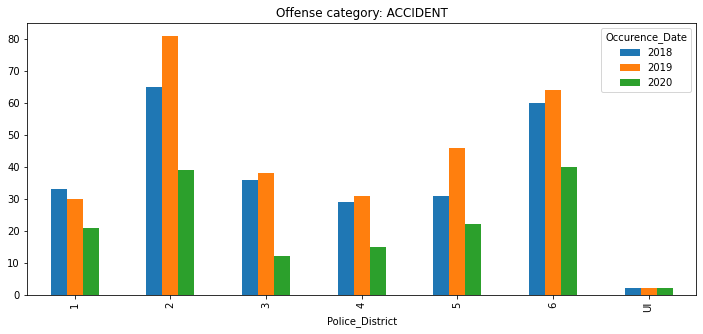

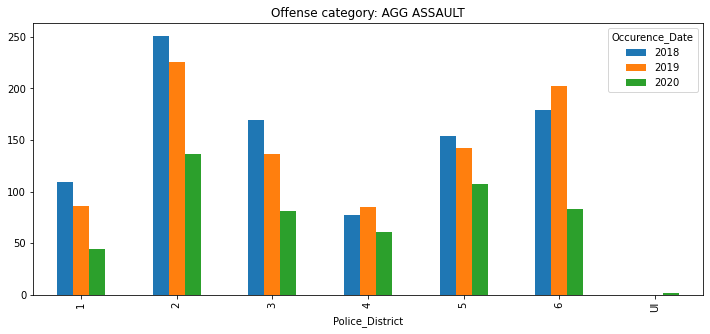

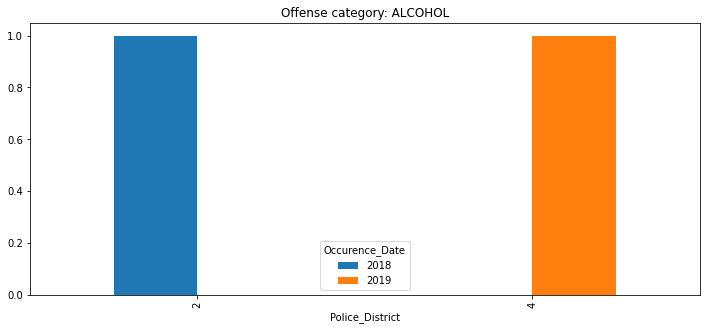

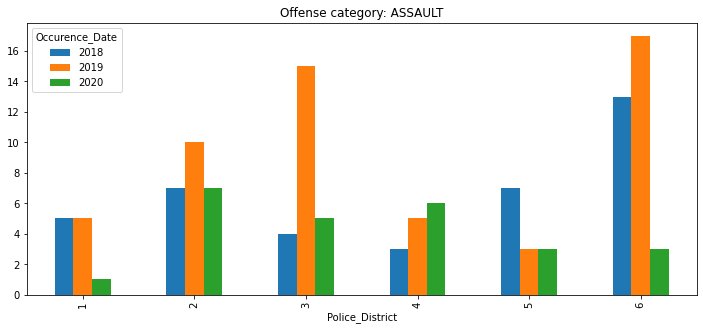

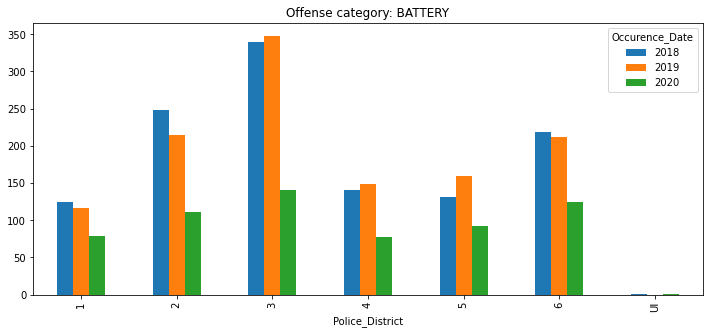

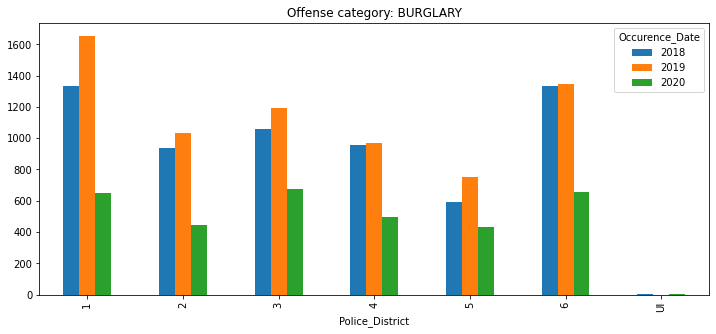

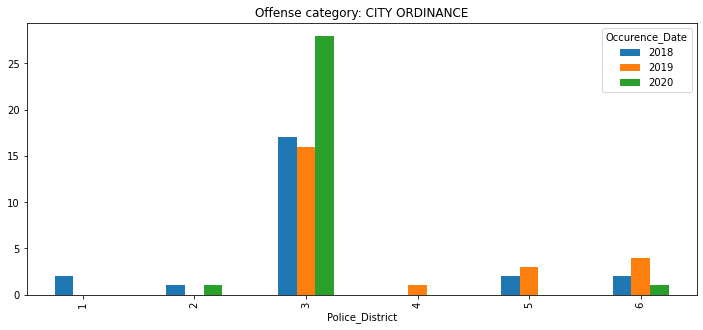

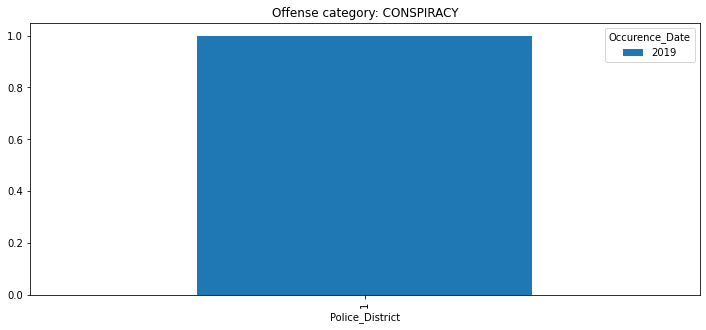

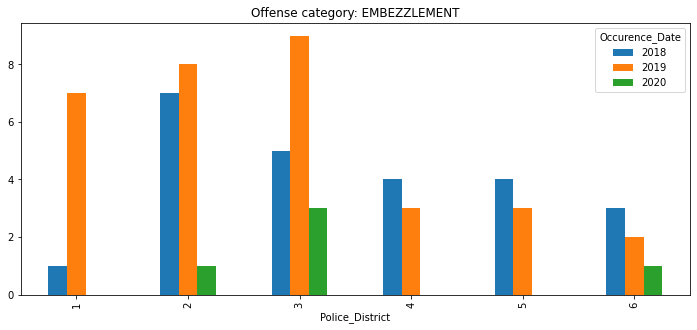

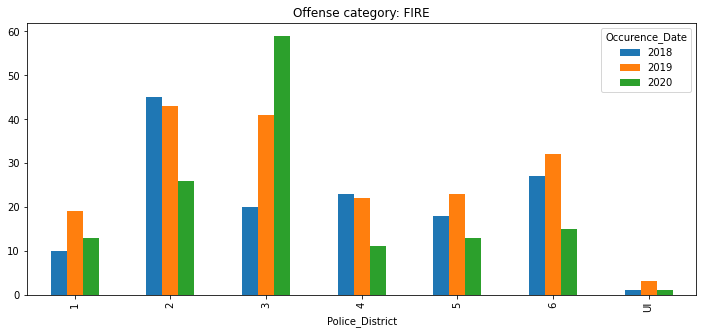

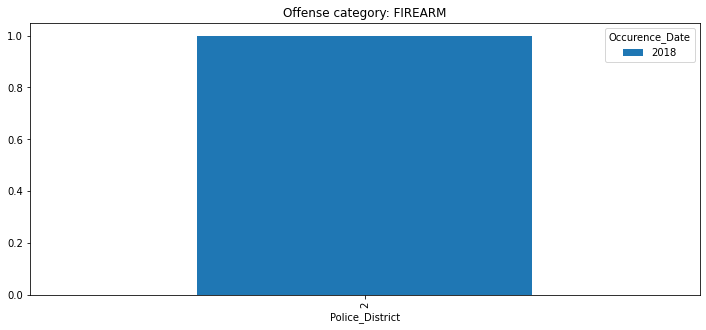

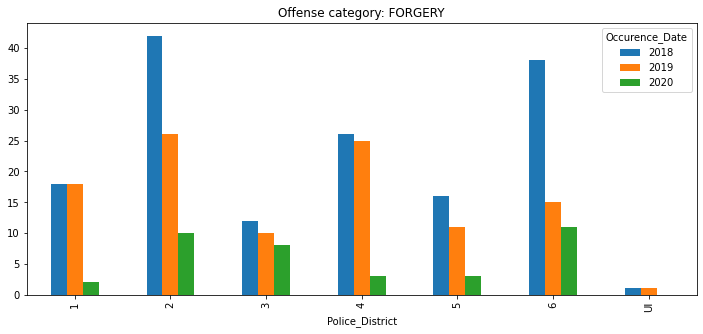

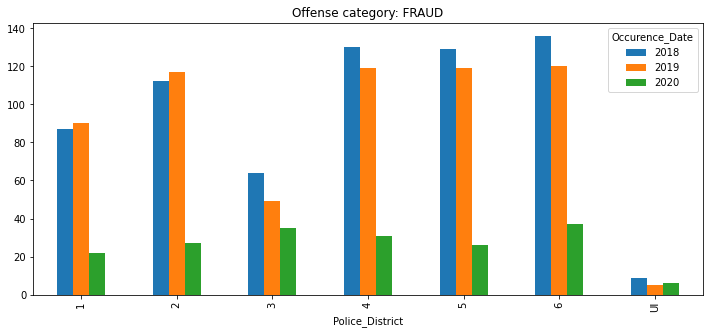

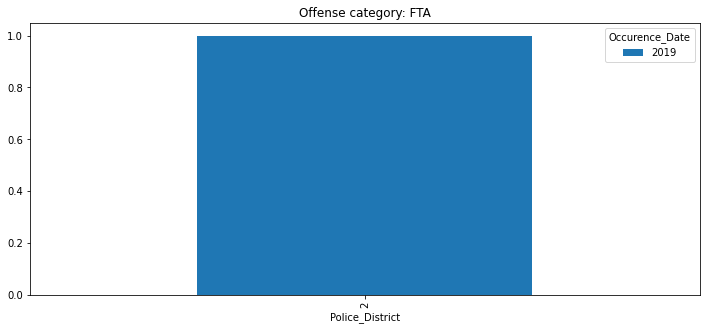

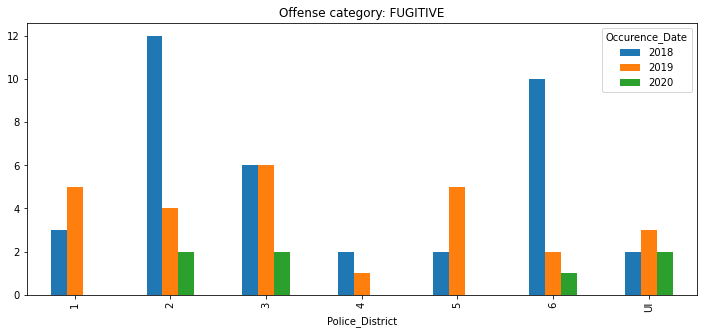

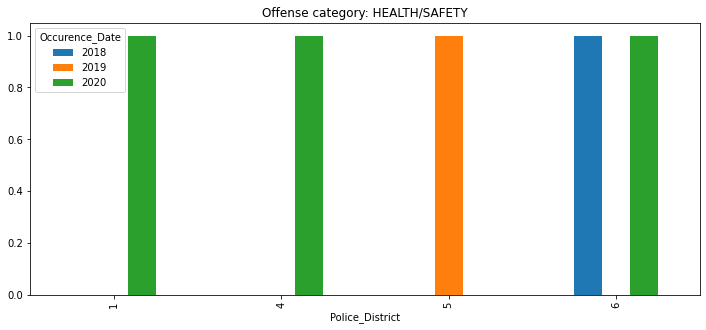

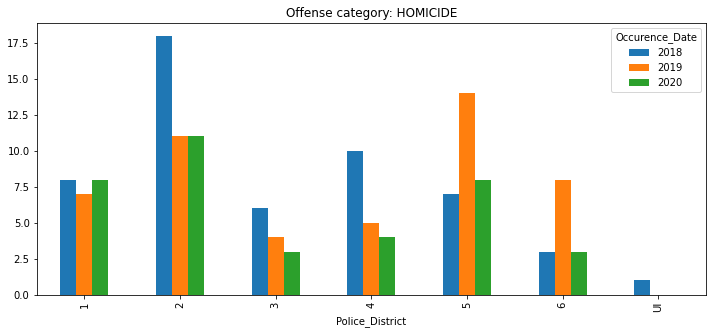

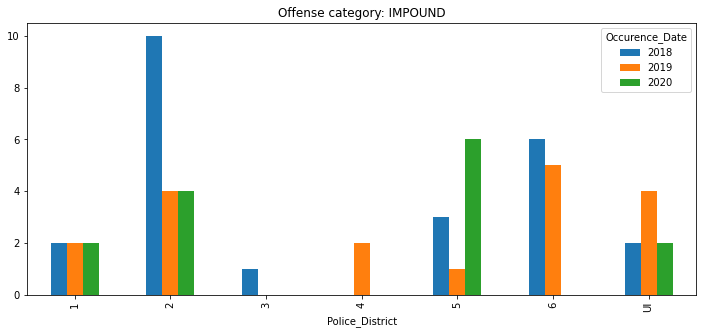

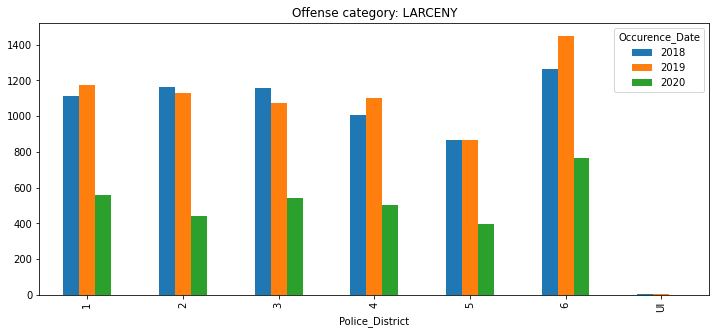

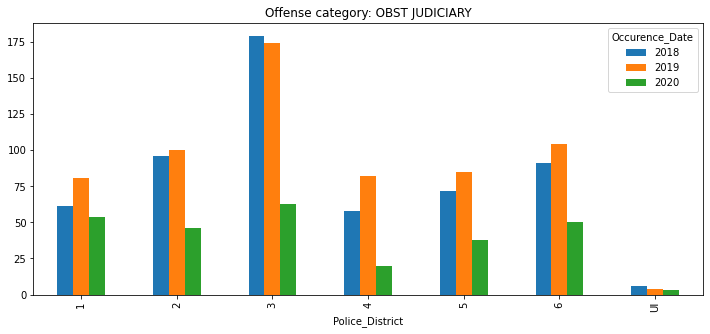

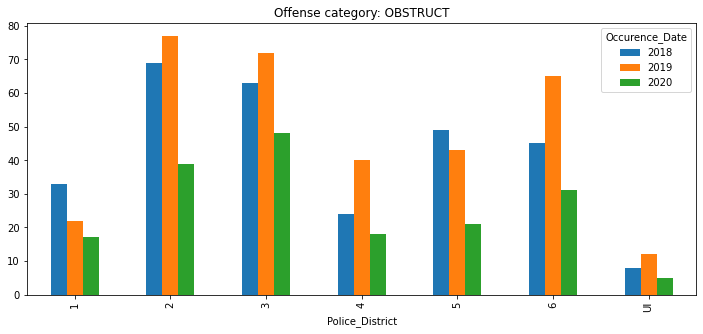

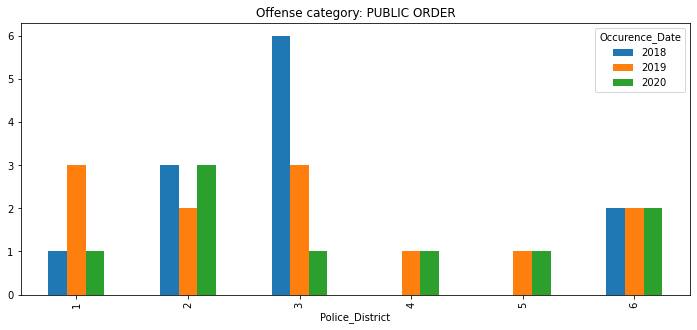

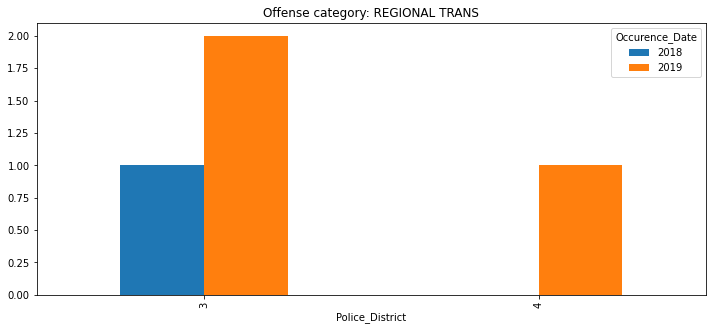

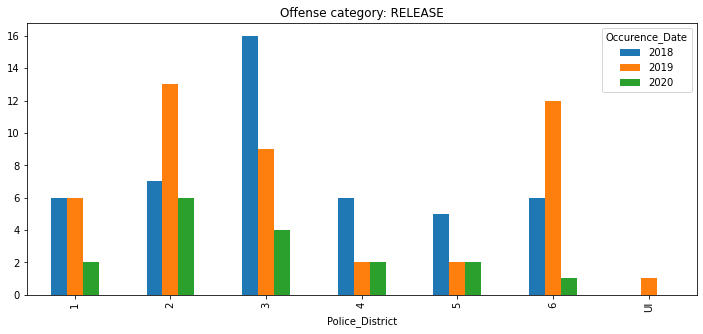

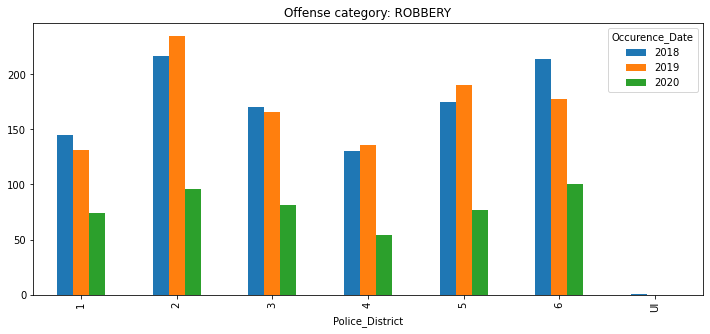

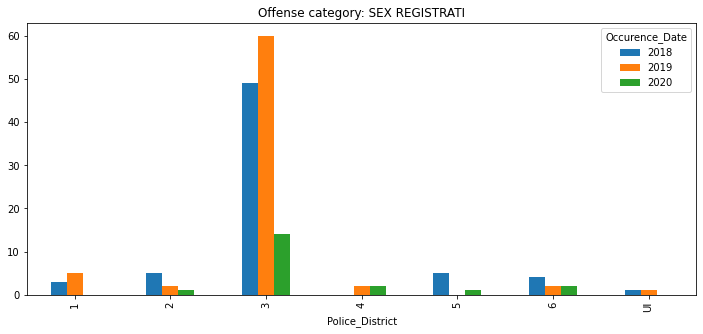

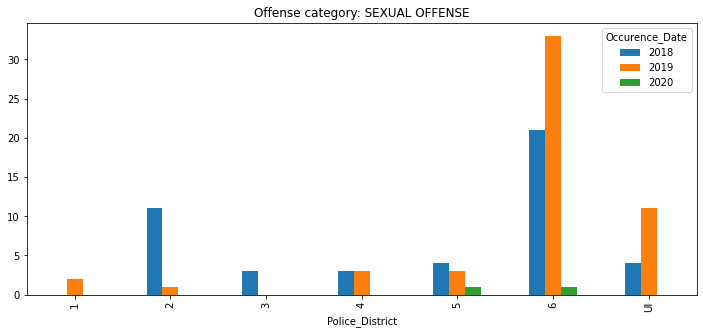

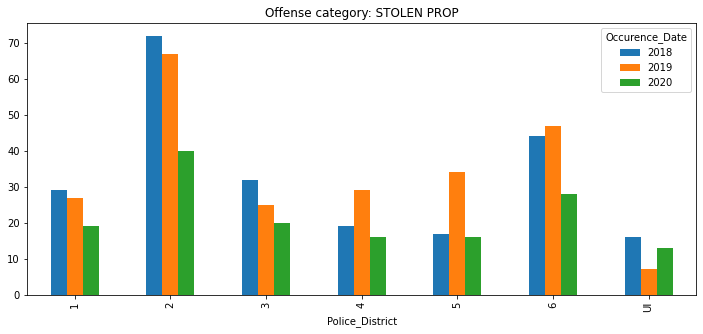

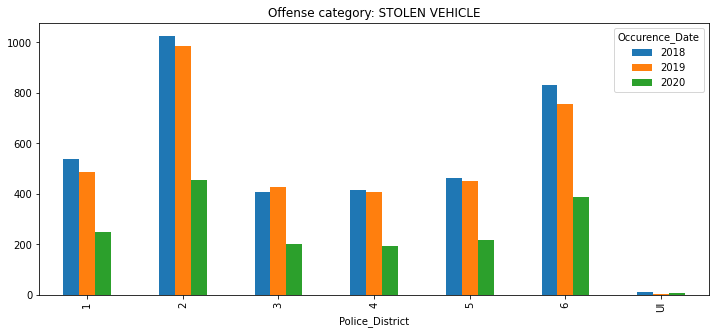

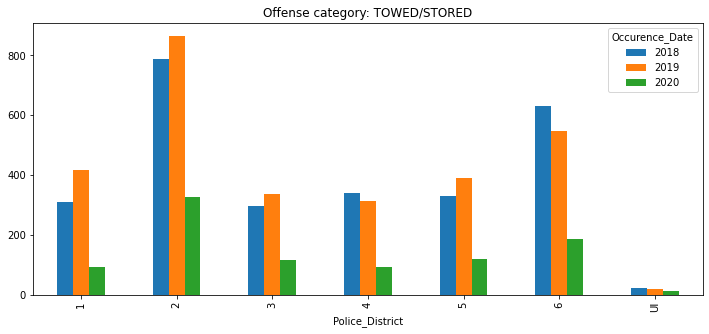

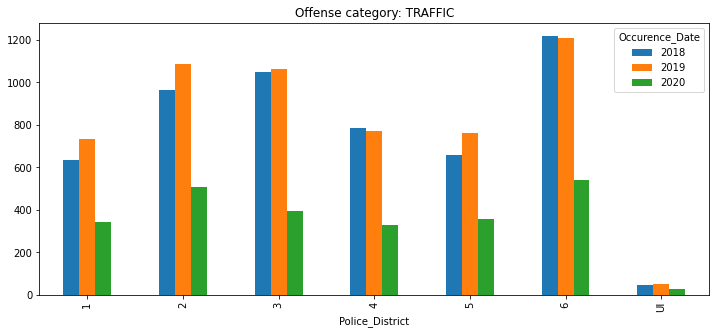

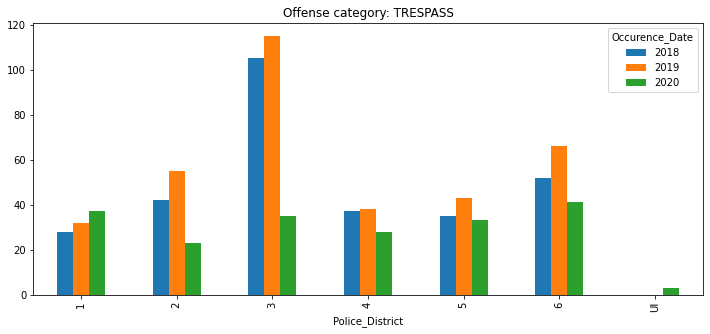

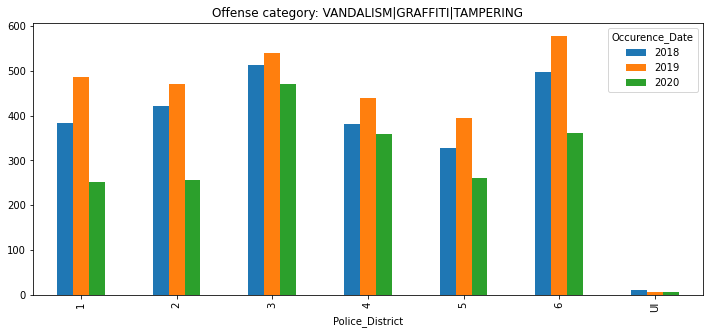

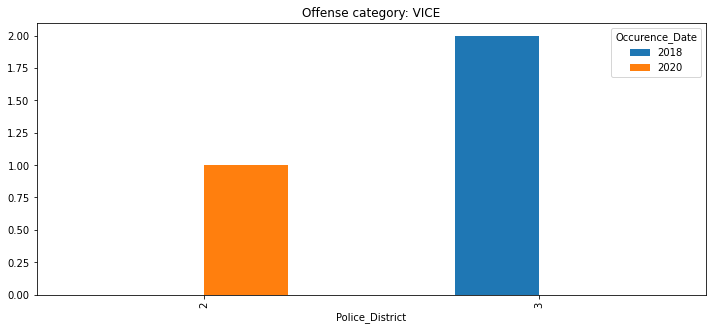

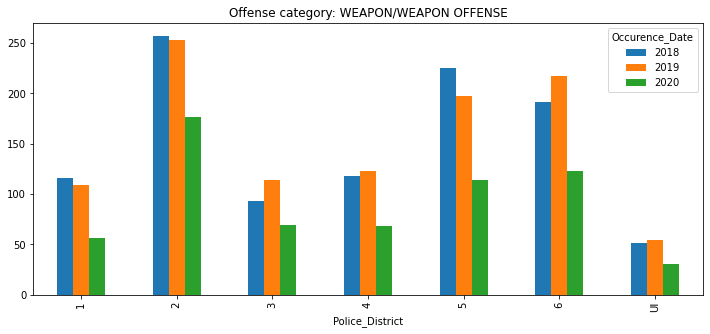

In [568]:
crime_cat_pd = crime_new.groupby(['general_category', crime_new.index.year, 'Police_District'])['Record_ID'].count()
#crime_cat_pd.reset_index().pivot_table('Record_ID', ['general_category','Police_District'], 'Occurence_Date')#.plot(kind = 'bar', stacked = True).index
crime_cat_pd = crime_cat_pd.reset_index().pivot_table('Record_ID', ['general_category'],['Police_District', 'Occurence_Date'])#.plot(kind = 'bar')

crime_cat_pd.loc['290 (G) (2)'].reset_index().pivot_table('290 (G) (2)', 'Police_District', 'Occurence_Date').plot(kind = 'bar')

for cat in crime_cat_pd.index.unique():
    crime_cat_pd.loc[cat].reset_index().pivot_table(cat, 'Police_District', 'Occurence_Date').plot(kind = 'bar')
    plt.title(f"Offense category: {cat}")
    plt.show()

    #     print(type(gen_cat))
#     print(crime_cat_pd[gen_cat])
#     print("-----")

#sns.FacetGrid(crime_cat_pd.reset_index(), col="general_category", col_wrap=3, sharey = False).map(plt.bar, "Police_District", "Record_ID")
#sns.FacetGrid(crime_cat_pd.reset_index(), col="general_category", col_wrap=3, hue = 'Occurence_Date', sharey = False).map(sns.barplot, "Police_District", "Record_ID")


In [575]:
# District 3 has the highest crime recorded in the last 3 years for the crime categories -- CITY ordinance and fire
crime_new[crime_new.index.year == 2020].query("Police_District == '3' & general_category == 'CITY ORDINANCE'")

Record_ID  Offense_Code Offense_Ext  \
Occurence_Date                                                   
2020-01-30 19:52:00+00:00    1437101          7399         101   
2020-02-17 17:57:00+00:00    1438814          7399         54A   
2020-02-28 17:04:00+00:00    1441168          7399         54A   
2020-03-04 15:48:00+00:00    1442133          7399         54A   
2020-04-20 15:57:00+00:00    1450172          7399         54A   
2020-06-02 04:40:00+00:00    1457291          7399         701   
2020-06-02 03:30:00+00:00    1457520          7399         701   
2020-06-02 05:00:00+00:00    1457522          7399         701   
2020-06-02 05:00:00+00:00    1457524          7399         701   
2020-06-02 06:59:00+00:00    1457525          7399         701   
2020-06-02 05:00:00+00:00    1457526          7399         701   
2020-06-02 05:00:00+00:00    1457531          7399         701   
2020-06-02 05:30:00+00:00    1457532          7399         701   
2020-06-02 04:44:00+00:00    1457534          7399         101   
2020-06-02 05:41:00+00:00    1457535          7399         701   
2020-06-02 04:45:00+00:00    1457536          7399         701   
2020-06-02 05:00:00+00:00    1457537          7399         701   
2020-06-02 05:30:00+00:00    1457538          7399         701   
2020-06-03 05:01:00+00:00    1457584          7399         701   
2020-06-03 05:11:00+00:00    1457585          7399         701   
2020-06-03 04:30:00+00:00    1457692          7399         701   
2020-06-03 04:30:00+00:00    1457728          7399         701   
2020-06-03 05:14:00+00:00    1457737          7399         701   
2020-06-03 05:40:00+00:00    1457753          7399         701   
2020-06-03 05:48:00+00:00    1457767          7399         701   
2020-06-05 04:50:00+00:00    1458215          7399         701   
2020-06-01 03:00:00+00:00    1458429          7399         701   
2020-07-06 15:54:00+00:00    1463098          7399         54A   

                          Offense_Category                     Description  \
Occurence_Date                                                               
2020-01-30 19:52:00+00:00   CITY ORDINANCE  9.82.020 SCC NO TRESPASS/LOITE   
2020-02-17 17:57:00+00:00   CITY ORDINANCE  12.24.100SCC BLOCKING SIDEWALK   
2020-02-28 17:04:00+00:00   CITY ORDINANCE  12.24.100SCC BLOCKING SIDEWALK   
2020-03-04 15:48:00+00:00   CITY ORDINANCE  12.24.100SCC BLOCKING SIDEWALK   
2020-04-20 15:57:00+00:00   CITY ORDINANCE  12.24.100SCC BLOCKING SIDEWALK   
2020-06-02 04:40:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 03:30:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:00:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:00:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 06:59:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:00:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:00:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:30:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 04:44:00+00:00   CITY ORDINANCE  9.82.020 SCC NO TRESPASS/LOITE   
2020-06-02 05:41:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 04:45:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:00:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-02 05:30:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 05:01:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 05:11:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 04:30:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 04:30:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 05:14:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 05:40:00+00:00   CITY ORDINANCE  2.116.100(B) AID ENMY/IMP LIFE   
2020-06-03 05:48:0

In [578]:
crime_new[crime_new.index.year == 2020].query("Police_District == '3' & general_category == 'FIRE'").groupby(pd.Grouper(freq = 'M'))['Record_ID'].count()

Occurence_Date
2020-01-31 00:00:00+00:00    14
2020-02-29 00:00:00+00:00    16
2020-03-31 00:00:00+00:00     5
2020-04-30 00:00:00+00:00     6
2020-05-31 00:00:00+00:00    11
2020-06-30 00:00:00+00:00     6
2020-07-31 00:00:00+00:00     1
Freq: M, Name: Record_ID, dtype: int64

In [579]:
crime_new[crime_new.index.year == 2020].query("Police_District == '4' & general_category == 'CONSERVATION'")#.groupby(pd.Grouper(freq = 'M'))['Record_ID'].count()

Record_ID  Offense_Code Offense_Ext  \
Occurence_Date                                                   
2020-07-05 23:20:00+00:00    1463403          6201          32   
2020-07-08 15:09:00+00:00    1463503          6201           1   

                          Offense_Category                     Description  \
Occurence_Date                                                               
2020-07-05 23:20:00+00:00     CONSERVATION  597.7(A) LEAVE ANIMAL IN VEHIC   
2020-07-08 15:09:00+00:00     CONSERVATION  597(A) PC MUTILATE ETC ANIMALS   

                          Police_District Beat  Grid  year  month        date  \
Occurence_Date                                                                  
2020-07-05 23:20:00+00:00               4   4C  1279  2020      7  2020-07-05   
2020-07-08 15:09:00+00:00               4   4B  0986  2020      7  2020-07-08   

                           dayofyear general_category  
Occurence_Date                                         
2020-07-05 23:20:00+00:00        187     CONSERVATION  
2020-07-08 15:09:00+00:00        190     CONSERVATION

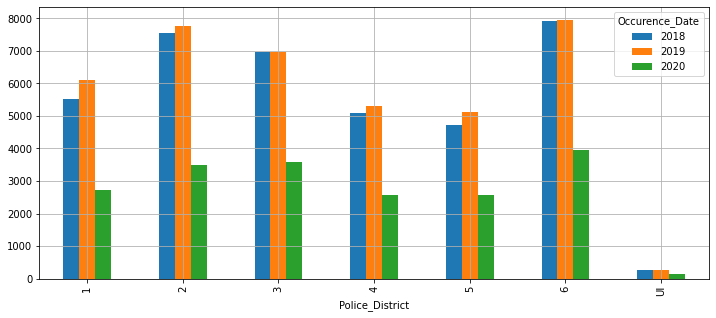

In [632]:
crime_new.groupby(['Police_District', crime_new.index.year])['Record_ID'].count().unstack().plot(kind = 'bar')
plt.grid()

- District 6 has the highest number of records is the last 3 years
- Though the number of crime recorded decreased post COVID-19, district 6 still remains the district with highest number of crimes



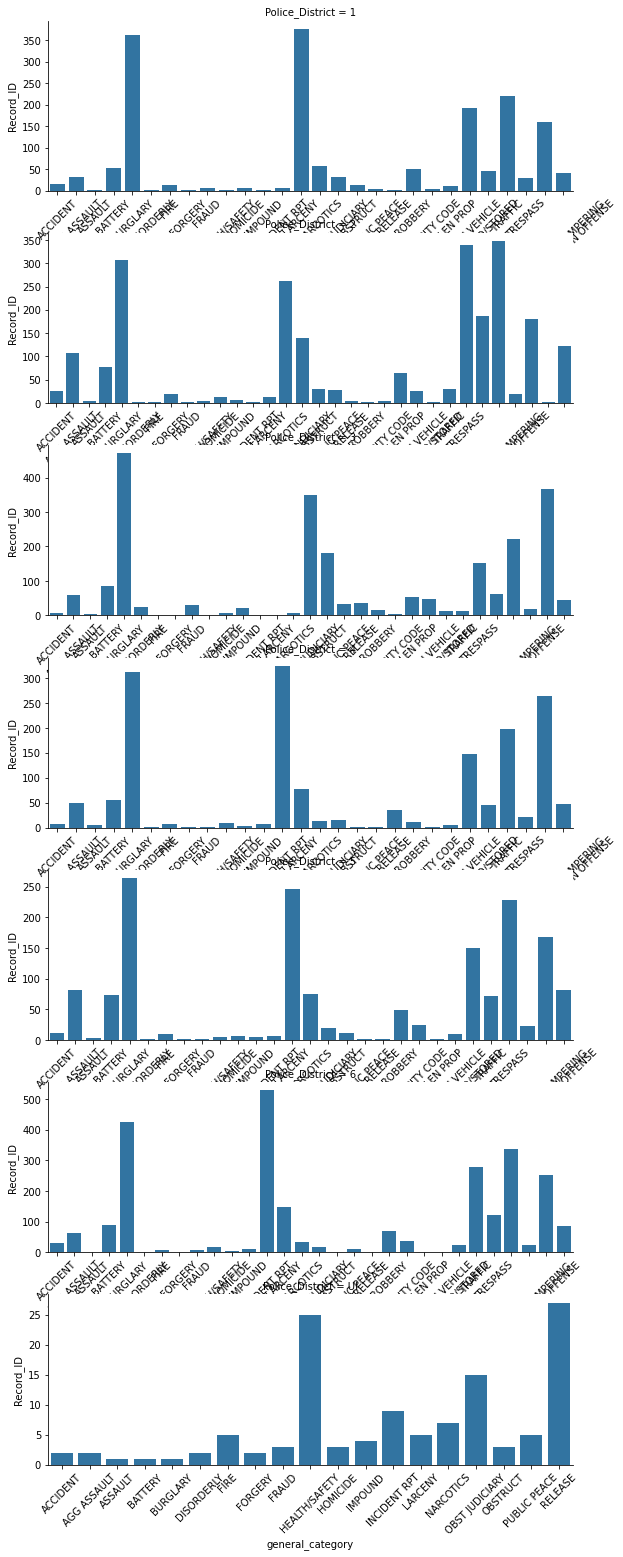

In [639]:
crime_district = crime_new[(crime_new.index.year == 2020) & (crime_new.index. month > 2)].groupby(['Police_District', 'general_category'])['Record_ID'].count()
crime_district = crime_district.reset_index()

g = sns.FacetGrid(crime_district, col="Police_District", col_wrap=1, aspect = 3, sharex = False, sharey = False)
g.map(sns.barplot, "general_category", "Record_ID")
g.set_xticklabels(rotation = 45)
#plt.xticks(rotation = 90)

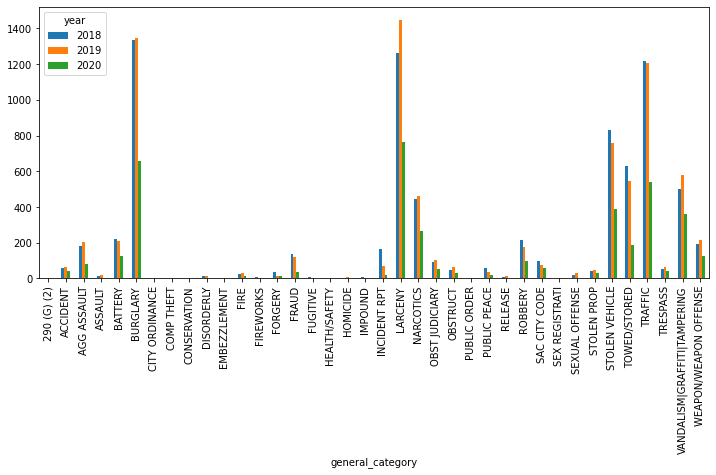

In [636]:
crime_new[crime_new.Police_District == '6'].groupby(['general_category', 'year'])['Record_ID'].count().unstack().plot(kind = 'bar')

In [91]:
# crime_clean = crime.drop_duplicates()
# crime_clean.Record_ID[crime_clean.Record_ID.duplicated()]

# crime_clean[crime_clean.Record_ID == 1464805]

Record_ID  Offense_Code Offense_Ext Offense_Category  \
54389    1464805          5213          5B   WEAPON OFFENSE   
96541    1464805          5213          5B   WEAPON OFFENSE   

                         Description Police_District Beat  Grid  \
54389  246.3(A) NEGL DISCH FIREARM-M               5   5A  1398   
96541  246.3(A) NEGL DISCH FIREARM-M               5   5A  1398   

                 Occurence_Date  year  month        date  \
54389 2020-07-13 16:00:00+00:00  2020      7  2020-07-13   
96541 2019-09-15 14:41:00+00:00  2019      9  2019-09-15   

            general_category  
54389  WEAPON/WEAPON OFFENSE  
96541  WEAPON/WEAPON OFFENSE

Census Tracts are small, relatively permanent statistical subdivisions of a county or equivalent entity that are updated by local participants prior to each decennial census as part of the Census Bureau's Participant Statistical Areas Program. <br>

Table 1: Census Population Summary<br>

- Missing values: 0
- ObjectID, State, county, tract, block can be dropped for EDA

In [55]:
sql_query = "PRAGMA table_info(Sacramento_Crime_2019);"
pd.read_sql_query(sql_query, connection)

cid              name     type  notnull dflt_value  pk
0    0          OBJECTID  INTEGER        0       None   0
1    1         Record_ID  INTEGER        0       None   0
2    2      Offense_Code  INTEGER        0       None   0
3    3       Offense_Ext     TEXT        0       None   0
4    4  Offense_Category     TEXT        0       None   0
5    5       Description     TEXT        0       None   0
6    6   Police_District     TEXT        0       None   0
7    7              Beat     TEXT        0       None   0
8    8              Grid     TEXT        0       None   0
9    9    Occurence_Date     TEXT        0       None   0

In [78]:
pd.read_sql_query("SELECT * FROM Sacramento_Crime_2019 WHERE RECORD_ID = '1365074'", connection)

OBJECTID  Record_ID  Offense_Code Offense_Ext Offense_Category  \
0      2501    1365074          5400           0          TRAFFIC   
1      2787    1365074          5400           0          TRAFFIC   

               Description Police_District Beat  Grid          Occurence_Date  
0  TRAFFIC ACCIDENT-INJURY               2   2C  0568  2019/01/25 22:08:00+00  
1  TRAFFIC ACCIDENT-INJURY               2   2C  0568  2019/01/25 22:08:00+00

## TABLE 2: Sacramento_Crime_2019

-- NO MISSING VALUES 
-- 2019 AND 2020 TABLES CAN BE MERGED TOGETHER
-- THERE ARE SOME DUPLICATE VALUES BASED AFTER REMOVING OBJECT NUMBER

In [88]:
sql_query = "PRAGMA table_info(POLICE_GRIDS);"
pd.read_sql_query(sql_query, connection)

cid           name     type  notnull dflt_value  pk
0    0       OBJECTID  INTEGER        0       None   0
1    1           GRID  INTEGER        0       None   0
2    2    Shape__Area     REAL        0       None   0
3    3  Shape__Length     REAL        0       None   0

In [89]:
sql_query = "SELECT COUNT(DISTINCT OBJECTID), COUNT(DISTINCT GRID), COUNT(DISTINCT SHAPE__AREA), \
COUNT(DISTINCT SHAPE__LENGTH) FROM POLICE_GRIDS;"
pd.read_sql_query(sql_query, connection)

COUNT(DISTINCT OBJECTID)  COUNT(DISTINCT GRID)  \
0                       582                   578   

   COUNT(DISTINCT SHAPE__AREA)  COUNT(DISTINCT SHAPE__LENGTH)  
0                          582                            582

In [ ]:
## TABLE: POLICE GRID: NO MISSING VALUES
## ONLY MAP INFORMATION

In [90]:
sql_query = "PRAGMA table_info(POLICE_BEATS);"
pd.read_sql_query(sql_query, connection)

cid           name     type  notnull dflt_value  pk
0    0       OBJECTID  INTEGER        0       None   0
1    1           BEAT     TEXT        0       None   0
2    2    Shape__Area     REAL        0       None   0
3    3  Shape__Length     REAL        0       None   0

In [91]:
sql_query = "SELECT COUNT(DISTINCT OBJECTID), COUNT(DISTINCT BEAT), COUNT(DISTINCT SHAPE__AREA), \
COUNT(DISTINCT SHAPE__LENGTH) FROM POLICE_BEATS;"
pd.read_sql_query(sql_query, connection)

COUNT(DISTINCT OBJECTID)  COUNT(DISTINCT BEAT)  \
0                        21                    20   

   COUNT(DISTINCT SHAPE__AREA)  COUNT(DISTINCT SHAPE__LENGTH)  
0                           21                             21

In [92]:
sql_query = "SELECT * FROM POLICE_BEATS;"
pd.read_sql_query(sql_query, connection)

OBJECTID BEAT   Shape__Area  Shape__Length
0          1   1A  3.653114e+08  100081.027584
1          2   1B  1.305404e+08   71647.079664
2          3   1C  9.605794e+07   58505.945279
3          4   2A  2.579057e+08  106492.182350
4          5   2B  1.052615e+08   45857.297304
5          6   2C  1.432347e+08   60144.617329
6          7   3A  3.026238e+07   25479.545913
7          8   3A  5.650636e+07   30563.178776
8          9   3B  6.360874e+07   42028.602393
9         10   6E  1.349553e+08   68977.071134
10        11   3M  1.748030e+07   18903.332732
11        12   4A  1.587205e+08   64986.287639
12        13   4B  1.216792e+08   58995.211004
13        14   4C  2.363464e+08   67249.857637
14        15   5A  1.529143e+08   53672.448775
15        16   5B  8.917072e+07   52147.491955
16        17   5C  1.247710e+08   64947.335747
17        18   6A  4.883228e+07   39850.747041
18        19   6B  1.077893e+08   64345.131699
19        20   6C  2.646083e+08   80754.296502
20        21   6D  9.938908e+07   45023.791829

- NO MISSING VALUES
-BEAT 3A IS DUPLICATED

In [93]:
sql_query = "PRAGMA table_info(POLICE_DISTRICTS);"
pd.read_sql_query(sql_query, connection)

cid           name     type  notnull dflt_value  pk
0    0       OBJECTID  INTEGER        0       None   0
1    1       DISTRICT  INTEGER        0       None   0
2    2    Shape__Area     REAL        0       None   0
3    3  Shape__Length     REAL        0       None   0

In [94]:
sql_query = "SELECT COUNT(DISTINCT OBJECTID), COUNT(DISTINCT DISTRICT), COUNT(DISTINCT SHAPE__AREA), \
COUNT(DISTINCT SHAPE__LENGTH) FROM POLICE_DISTRICTS;"
pd.read_sql_query(sql_query, connection)

COUNT(DISTINCT OBJECTID)  COUNT(DISTINCT DISTRICT)  \
0                         6                         6   

   COUNT(DISTINCT SHAPE__AREA)  COUNT(DISTINCT SHAPE__LENGTH)  
0                            6                              6

In [95]:
sql_query = "PRAGMA table_info(Sacramento_Dispatch_2020);"
pd.read_sql_query(sql_query, connection)

cid               name     type  notnull dflt_value  pk
0     0                  X     REAL        0       None   0
1     1                  Y     REAL        0       None   0
2     2           OBJECTID  INTEGER        0       None   0
3     3          Record_ID  INTEGER        0       None   0
4     4          Call_Type     TEXT        0       None   0
5     5        Description     TEXT        0       None   0
6     6  Reporting_Officer     TEXT        0       None   0
7     7            Unit_ID     TEXT        0       None   0
8     8     Report_Created     TEXT        0       None   0
9     9           Location     TEXT        0       None   0
10   10    Police_District     TEXT        0       None   0
11   11               Beat     TEXT        0       None   0
12   12               Grid     TEXT        0       None   0
13   13       X_Coordinate  INTEGER        0       None   0
14   14       Y_Coordinate  INTEGER        0       None   0
15   15        Day_of_Week     TEXT        0       None   0
16   16     Occurence_Date     TEXT        0       None   0
17   17      Received_Date     TEXT        0       None   0
18   18      Dispatch_Date     TEXT        0       None   0
19   19       Enroute_Date     TEXT        0       None   0
20   20      At_Scene_Date     TEXT        0       None   0
21   21         Clear_Date     TEXT        0       None   0

In [119]:
pd.read_sql_query('SELECT * FROM Sacramento_Dispatch_2020 LIMIT 5;', connection)

X          Y  OBJECTID  Record_ID Call_Type  \
0 -121.505698  38.596674         1    7799679        AU   
1 -121.524610  38.631335         2    7799603       952   
2 -121.430754  38.616285         3    7799929       996   
3 -121.505159  38.655728         4    7800047    ALMSEC   
4 -121.431055  38.638155         5    7807163    503RPT   

                     Description Reporting_Officer Unit_ID Report_Created  \
0            ALL UNITS BROADCAST              None    None              N   
1     INCOMPLETE CALL FOR POLICE               529    1B16              N   
2                 FOUND PROPERTY               283    RT31              N   
3  ALARM-SECURE NO EVID OF CRIME              0904    1C19              N   
4          STOLEN VEHICLE-REPORT              6231    None              N   

                     Location  ...  Grid X_Coordinate Y_Coordinate  \
0  JIBBOOM ST / RICHARDS BLVD  ...  0721      6702937      1979502   
1         3419 LOGGERHEAD WAY  ...  0344      6697466      1992096   
2            2700 ACADEMY WAY  ...  0556      6724311      1986769   
3            1912 DEL PASO RD  ...  0306      6702974      2001009   
4             1544 HARRIS AVE  ...  0505      6724175      1994733   

   Day_of_Week          Occurence_Date           Received_Date  \
0          Wed  2020/01/01 22:40:45+00  2020/01/01 22:40:45+00   
1          Wed  2020/01/01 21:24:21+00  2020/01/01 21:24:21+00   
2          Wed  2020/01/02 02:47:07+00  2020/01/02 02:47:07+00   
3          Wed  2020/01/02 00:47:12+00  2020/01/02 00:47:12+00   
4          Wed  2020/01/01 10:56:25+00  2020/01/01 10:56:25+00   

            Dispatch_Date            Enroute_Date           At_Scene_Date  \
0  1970/01/01 00:00:00+00  1970/01/01 00:00:00+00  1970/01/01 00:00:00+00   
1  2020/01/01 21:39:35+00  2020/01/01 21:39:41+00  1970/01/01 00:00:00+00   
2  2020/01/02 02:47:07+00  2020/01/02 02:47:07+00  2020/01/02 02:47:07+00   
3  2020/01/02 03:24:19+00  2020/01/02 03:24:19+00  2020/01/02 05:12:24+00   
4  1970/01/01 00:00:00+00  1970/01/01 00:00:00+00  1970/01/01 00:00:00+00   

               Clear_Date  
0  2020/01/01 22:52:52+00  
1  2020/01/01 21:40:04+00  
2  2020/01/02 02:48:43+00  
3  2020/01/02 05:17:31+00  
4  2020/01/01 20:29:09+00  

[5 rows x 22 columns]

### Checking of data quality

- All the data were collected and reported by Sacramento's police department based on FBI's Uniform  Crime Reporting (UCR) standard
- No missing values found in the data


In [145]:
census = pd.read_sql_query('SELECT * FROM Census_Population;', connection)

In [151]:
census = census.drop(columns = ['OBJECTID', 'STATEFP10', 'COUNTYFP10'])

In [165]:
census.groupby('Dist').sum().iloc[:,3:-4].sum(axis=1)

Dist
1    242360
2    124142
3    110177
4     99520
5    109140
6    114706
7    116751
8    141456
dtype: int64

In [173]:
census.groupby('TRACTCE10').count()

BLOCKCE10  GEOID10  Dist  TOTAL  WHITE  BLACK  AIAN  ASIAN  NHPI  \
TRACTCE10                                                                     
100               51       51    51     51     51     51    51     51    51   
200               85       85    85     85     85     85    85     85    85   
300               64       64    64     64     64     64    64     64    64   
400              118      118   118    118    118    118   118    118   118   
500               92       92    92     92     92     92    92     92    92   
...              ...      ...   ...    ...    ...    ...   ...    ...   ...   
9614              14       14    14     14     14     14    14     14    14   
9618               7        7     7      7      7      7     7      7     7   
9633              23       23    23     23     23     23    23     23    23   
9634              31       31    31     31     31     31    31     31    31   
9900               5        5     5      5      5      5     5      5     5   

           OTHER  TWOMORE  HISPANIC  SQ_MILE  POP_SQ_MIL  Shape__Area  \
TRACTCE10                                                               
100           51       51        51       51          51           51   
200           85       85        85       85          85           85   
300           64       64        64       64          64           64   
400          118      118       118      118         118          118   
500           92       92        92       92          92           92   
...          ...      ...       ...      ...         ...          ...   
9614          14       14        14       14          14           14   
9618           7        7         7        7           7            7   
9633          23       23        23       23          23           23   
9634          31       31        31       31          31           31   
9900           5        5         5        5           5            5   

           Shape__Length  
TRACTCE10                 
100                   51  
200                   85  
300                   64  
400                  118  
500                   92  
...                  ...  
9614                  14  
9618                   7  
9633                  23  
9634                  31  
9900                   5  

[123 rows x 16 columns]